In [10]:
%pip install -q rhino3dm shapely trimesh matplotlib pyvista pandas
%pip install PyniteFEA[all]
%pip install Pynite
%pip install trimesh

Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
for nid, node in model.nodes.items():
    print(f"{nid}: DX={node.DX['1.2DL+1.0W']:.6e}, DY={node.DY['1.2DL+1.0W']:.6e}, DZ={node.DZ['1.2DL+1.0W']:.6e}")


AttributeError: 'rhino3dm._rhino3dm.File3dm' object has no attribute 'nodes'

In [ ]:
import json

deformed_nodes = []
SCALE = 50  # same as `rndr.deformed_scale` in Renderer()

for nid, node in model.nodes.items():
    dx = node.DX.get('1.2DL+1.0W', 0.0)
    dy = node.DY.get('1.2DL+1.0W', 0.0)
    dz = node.DZ.get('1.2DL+1.0W', 0.0)

    deformed_nodes.append({
        "id": nid,
        "original": {
            "x": node.X,
            "y": node.Y,
            "z": node.Z
        },
        "deformed": {
            "x": node.X + dx * SCALE,
            "y": node.Y + dy * SCALE,
            "z": node.Z + dz * SCALE
        },
        "dx": dx,
        "dy": dy,
        "dz": dz
    })

with open("deformed_nodes.json", "w") as f:
    json.dump(deformed_nodes, f, indent=2)

# At last, print the JSON structure
print(json.dumps(deformed_nodes, indent=2))


[
  {
    "id": "N0",
    "original": {
      "x": -282.3116401,
      "y": 269.3526109,
      "z": 0.0
    },
    "deformed": {
      "x": -282.3116401,
      "y": 269.3526109,
      "z": 0.0
    },
    "dx": 0.0,
    "dy": 0.0,
    "dz": 0.0
  },
  {
    "id": "N1",
    "original": {
      "x": -282.3116401,
      "y": 269.3526109,
      "z": 118.10999999999999
    },
    "deformed": {
      "x": -282.39745269625735,
      "y": 269.4021665432545,
      "z": 118.06593911411568
    },
    "dx": -0.0017162519251479062,
    "dy": 0.0009911128650903055,
    "dz": -0.0008812177176862619
  },
  {
    "id": "N2",
    "original": {
      "x": -282.3116401,
      "y": 269.3526109,
      "z": 236.21999999999997
    },
    "deformed": {
      "x": -282.5142520344761,
      "y": 269.44652179685477,
      "z": 236.15569745192806
    },
    "dx": -0.004052238689522011,
    "dy": 0.001878217937095186,
    "dz": -0.0012860509614379548
  },
  {
    "id": "N3",
    "original": {
      "x": -282.3116401

In [ ]:
print("Beams DataFrame:")
print(df_beams.head())
print("\nColumns DataFrame:")
print(df_columns.head())
print("\nNodes DataFrame:")
print(df_nodes.head())

Beams DataFrame:
   ID i_node j_node  length
0  B0     N1     N4   4.511
1  B1     N2     N5   4.511
2  B2     N7    N10   4.511
3  B3     N8    N11   4.511
4  B4    N13    N16   4.511

Columns DataFrame:
   ID i_node j_node  length
0  C0     N0     N1     3.0
1  C1     N1     N2     3.0
2  C2     N3     N4     3.0
3  C3     N4     N5     3.0
4  C4     N6     N7     3.0

Nodes DataFrame:
   ID        X         Y    Z
0  N0 -7.17073   6.84157  0.0
1  N1 -7.17073   6.84157  3.0
2  N2 -7.17073   6.84157  6.0
3  N3 -7.17073  11.35236  0.0
4  N4 -7.17073  11.35236  3.0


In [ ]:
pip install pygltflib

Defaulting to user installation because normal site-packages is not writeable
  Using cached Deprecated-1.2.18-py2.py3-none-any.whl.metadata (5.7 kB)
  Using cached wrapt-1.17.2-cp313-cp313-win_amd64.whl.metadata (6.5 kB)
Using cached Deprecated-1.2.18-py2.py3-none-any.whl (10.0 kB)
Using cached wrapt-1.17.2-cp313-cp313-win_amd64.whl (38 kB)

   ---------------------------------------- 0/7 [wrapt]
   ----------- ---------------------------- 2/7 [marshmallow]
   ----------- ---------------------------- 2/7 [marshmallow]
   ----------------- ---------------------- 3/7 [typing-inspect]
   ---------------------------- ----------- 5/7 [dataclasses-json]
   ---------------------------- ----------- 5/7 [dataclasses-json]
   ---------------------------------- ----- 6/7 [pygltflib]
   ---------------------------------------- 7/7 [pygltflib]

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#CONNECT TO PYNITE

In [ ]:
#τρυ ον κασπερ βολιουμσ

In [8]:
#GLB TO 3DM CONVERTER

import rhino3dm
import pygltflib
import os
import numpy as np

def convert_glb_to_3dm(glb_path, output_3dm_path):
    """
    Loads a GLB file, extracts its mesh data, and saves it as a 3dm file.
    Only mesh geometry will be converted. Materials, animations, etc., are not translated.
    """
    if not os.path.exists(glb_path):
        raise FileNotFoundError(f"GLB file not found: {glb_path}")

    print(f"Loading GLB file from: {glb_path}")
    gltf = pygltflib.GLTF2().load(glb_path)

    model_3dm = rhino3dm.File3dm()

    # Iterate through GLTF meshes and add them to the 3dm model
    for mesh_idx, gltf_mesh in enumerate(gltf.meshes):
        print(f"Processing mesh: {gltf_mesh.name if gltf_mesh.name else f'Mesh_{mesh_idx}'}")
        
        for primitive in gltf_mesh.primitives:
            # Get vertex positions
            accessor_pos = gltf.accessors[primitive.attributes.POSITION]
            buffer_view_pos = gltf.bufferViews[accessor_pos.bufferView]
            buffer_pos = gltf.buffers[buffer_view_pos.buffer]
            
            # Extract vertices
            # Pygltflib returns data as bytes, convert to numpy array
            vertices_bytes = gltf.get_data_from_buffer_uri(buffer_pos.uri)[
                buffer_view_pos.byteOffset : buffer_view_pos.byteOffset + buffer_view_pos.byteLength
            ]
            # Assuming float32 for positions (common in glTF)
            vertices = np.frombuffer(vertices_bytes, dtype=np.float32).reshape(-1, 3)

            rhino_mesh = rhino3dm.Mesh()
            for v in vertices:
                rhino_mesh.Vertices.Add(v[0], v[1], v[2])

            # Get indices (faces)
            if primitive.indices is not None:
                accessor_indices = gltf.accessors[primitive.indices]
                buffer_view_indices = gltf.bufferViews[accessor_indices.bufferView]
                buffer_indices = gltf.buffers[buffer_view_indices.buffer]

                indices_bytes = gltf.get_data_from_buffer_uri(buffer_indices.uri)[
                    buffer_view_indices.byteOffset : buffer_view_indices.byteOffset + buffer_view_indices.byteLength
                ]
                
                # Determine dtype for indices (UINT8, UINT16, UINT32)
                if accessor_indices.componentType == pygltflib.UNSIGNED_BYTE:
                    indices_dtype = np.uint8
                elif accessor_indices.componentType == pygltflib.UNSIGNED_SHORT:
                    indices_dtype = np.uint16
                elif accessor_indices.componentType == pygltflib.UNSIGNED_INT:
                    indices_dtype = np.uint32
                else:
                    print(f"Warning: Unsupported index component type: {accessor_indices.componentType}. Skipping faces for this primitive.")
                    continue

                indices = np.frombuffer(indices_bytes, dtype=indices_dtype)

                # glTF uses flat arrays for indices, assuming triangles (mode 4)
                if primitive.mode == pygltflib.TRIANGLES: # Mode 4 for triangles
                    for i in range(0, len(indices), 3):
                        rhino_mesh.Faces.AddFace(int(indices[i]), int(indices[i+1]), int(indices[i+2]))
                else:
                    print(f"Warning: Skipping primitive with unsupported mode: {primitive.mode}. Only triangles (mode 4) are fully supported for faces.")
                    continue
            else:
                print(f"Warning: Primitive has no indices. Assuming sequential triangles, but this might not be correct for complex GLBs.")
                # If no indices, assume sequential triangles (0,1,2, 3,4,5, etc.)
                # This is less common for actual models but might happen.
                for i in range(0, len(vertices) - 2, 3):
                    rhino_mesh.Faces.AddFace(i, i+1, i+2)

            # Optional: Calculate normals (good practice for rendering)
            rhino_mesh.Normals.ComputeNormals()
            rhino_mesh.Compact() # Optimize mesh

            model_3dm.Objects.AddMesh(rhino_mesh)
    
    print(f"Saving 3dm file to: {output_3dm_path}")
    model_3dm.Write(output_3dm_path, 0) # 0 means "use default options"
    print("Conversion complete!")

# --- Define paths ---
# The path to your GLB file
glb_file_path = r"C:\Users\papad\Documents\GitHub\Octopusie\Reference Files\TALLERWALLFAIL.glb"

# Derive the output 3dm file path from the GLB file path
directory = os.path.dirname(glb_file_path)
file_name_without_ext = os.path.splitext(os.path.basename(glb_file_path))[0]
output_3dm_file_path = os.path.join(directory, f"{file_name_without_ext}.3dm")

# --- Run the conversion ---
try:
    convert_glb_to_3dm(glb_file_path, output_3dm_file_path)
    print(f"\nConversion successful! The 3DM file is saved at: {output_3dm_file_path}")

    # Now, you can run your original code using this new 3dm file
    # Example (assuming your original code is in the same script or imported):
    # original_rhino_path = output_3dm_file_path
    # model = rhino3dm.File3dm.Read(original_rhino_path)
    # # ... continue with the rest of your original script using 'model' ...

except FileNotFoundError as e:
    print(e)
    print("Please ensure the GLB file path is correct.")
except Exception as e:
    print(f"An error occurred during conversion: {e}")

Loading GLB file from: C:\Users\papad\Documents\GitHub\Octopusie\Reference Files\TALLERWALLFAIL.glb
Processing mesh: Mesh_0
Processing mesh: Mesh_1
Processing mesh: Mesh_2
Processing mesh: Mesh_3
Processing mesh: Mesh_4
Processing mesh: Mesh_5
Processing mesh: Mesh_6
Processing mesh: Mesh_7
Processing mesh: Mesh_8
Processing mesh: Mesh_9
Processing mesh: Mesh_10
Saving 3dm file to: C:\Users\papad\Documents\GitHub\Octopusie\Reference Files\TALLERWALLFAIL.3dm
Conversion complete!

Conversion successful! The 3DM file is saved at: C:\Users\papad\Documents\GitHub\Octopusie\Reference Files\TALLERWALLFAIL.3dm


In [ ]:
#CHECK THE HEIGHT OF EACH VOLUME FIX IT ON THIS CODE

In [ ]:
#and deletion from user?

In [ ]:
#after do the prototype pipeline

Detected 20 building floor footprints. Max Z height: 8.56m
Total meshes contributing to height calculation: 60


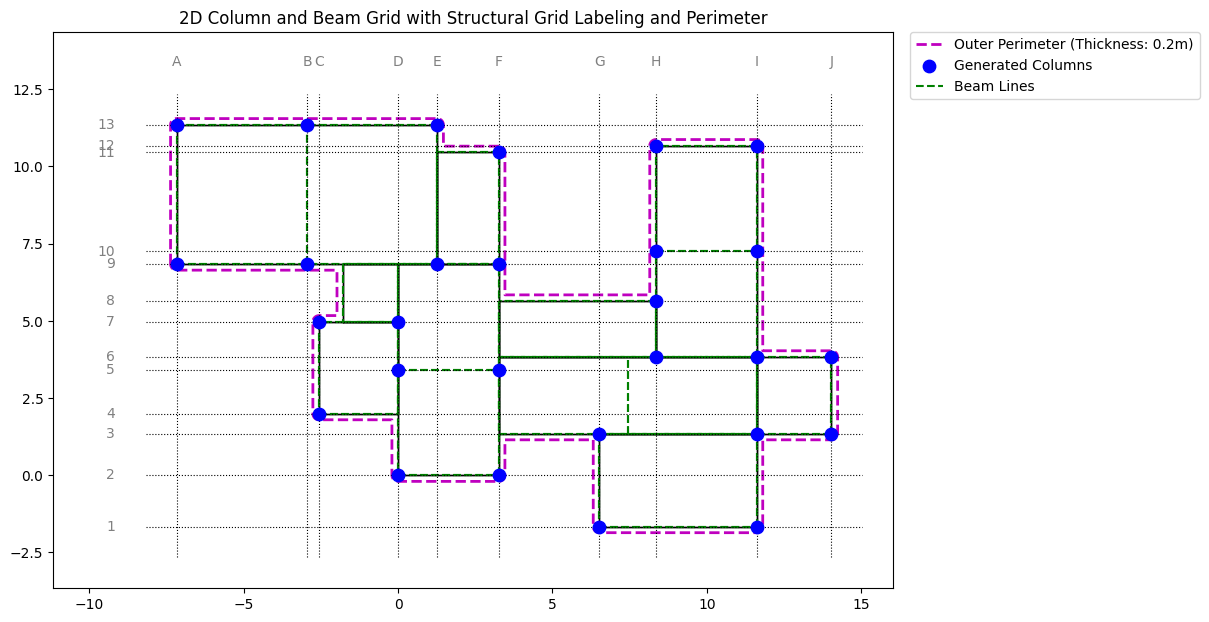

--- Generating data and Exporting CSVs & JSONs ---
Ensuring directory exists: c:\Users\papad\Documents\GitHub\Octopusie\eleftheriaexperiment\structural_data
✅ nodes.csv written to ..\eleftheriaexperiment\structural_data\nodes.csv
✅ nodes.json written to ..\eleftheriaexperiment\structural_data\nodes.json
✅ columns.csv written to ..\eleftheriaexperiment\structural_data\columns.csv
✅ columns.json written to ..\eleftheriaexperiment\structural_data\columns.json
✅ beams.csv written to ..\eleftheriaexperiment\structural_data\beams.csv
✅ beams.json written to ..\eleftheriaexperiment\structural_data\beams.json


In [ ]:
#MASHALLA STRUCUTURAL GRID GENERATOR
import rhino3dm
import os
import numpy as np
from shapely.geometry import Polygon, Point, MultiPolygon, LineString
import matplotlib.pyplot as plt
import csv
import pandas as pd
from collections import OrderedDict
import json # Import the json module

# File path
rhino_path = r"C:\Users\papad\Documents\GitHub\Octopusie\Reference Files\nihals.3dm" # Using the remembered path
if not os.path.exists(rhino_path):
    raise FileNotFoundError(f"File not found: {rhino_path}")

# Load model
model = rhino3dm.File3dm.Read(rhino_path)

# Extract geometries and their bounding boxes
# We will separate "floor" like volumes from "wall" like meshes based on bbox properties.
building_floor_footprints = [] # For generating columns/beams based on horizontal extent
all_mesh_bboxes = [] # To store all mesh bounding boxes for height lookups (walls and floors)
max_z = 0.0

# Define a small tolerance for "flatness" or "thinness" in Z
Z_FLATNESS_TOLERANCE = 0.1 # Adjust this value if your floor slabs are thicker/thinner

for obj in model.Objects:
    geom = obj.Geometry
    if geom.ObjectType == rhino3dm.ObjectType.Mesh:
        bbox = geom.GetBoundingBox()
        
        # Calculate 2D dimensions of the bounding box
        bbox_x_dim = bbox.Max.X - bbox.Min.X
        bbox_y_dim = bbox.Max.Y - bbox.Min.Y
        bbox_z_dim = bbox.Max.Z - bbox.Min.Z

        # Only consider meshes that are "flat" in Z (like floor slabs or ground planes)
        # and have a significant XY area as "building_volumes" for column/beam grids.
        # This filters out vertical walls.
        if bbox_z_dim < Z_FLATNESS_TOLERANCE and bbox_x_dim > 0.1 and bbox_y_dim > 0.1: # Also ensure meaningful XY dims
            base_pts = [
                [bbox.Min.X, bbox.Min.Y],
                [bbox.Max.X, bbox.Min.Y],
                [bbox.Max.X, bbox.Max.Y],
                [bbox.Min.X, bbox.Max.Y],
                [bbox.Min.X, bbox.Min.Y] # Close polygon
            ]
            poly = Polygon(base_pts)
            if poly.area > 1e-3: # Ensure it's a valid polygon with area
                building_floor_footprints.append(poly)
                
        # Store all mesh bounding boxes for height lookups later, regardless of their 2D area.
        # This includes vertical walls which are crucial for height determination.
        all_mesh_bboxes.append(bbox)
        
        max_z = max(max_z, bbox.Max.Z) # Global max Z for any geometry

if not building_floor_footprints:
    raise RuntimeError("No meaningful building floor footprints (meshes flat in Z with area) found in the model.")

print(f"Detected {len(building_floor_footprints)} building floor footprints. Max Z height: {max_z:.2f}m")
print(f"Total meshes contributing to height calculation: {len(all_mesh_bboxes)}")


# Ask for number of floors
while True:
    try:
        num_floors = int(input("How many floors does the building have? (e.g., 2 for ground + 1 middle + roof): "))
        if num_floors < 1:
            raise ValueError
        break
    except ValueError:
        print("Please enter a valid positive integer for the number of floors.")

# --- Section for perimeter line and wall thickness ---
while True:
    try:
        wall_thickness = float(input("Enter desired wall thickness for the perimeter (e.g., 0.3): "))
        if wall_thickness <= 0:
            raise ValueError
        break
    except ValueError:
        print("Please enter a valid positive number for wall thickness.")

# Combine all building polygons into a single MultiPolygon
# Use building_floor_footprints for this as they represent the horizontal extent
combined_building_polygon = MultiPolygon(building_floor_footprints)

# Get the exterior boundary of the combined building and offset it
try:
    exterior_perimeter = combined_building_polygon.buffer(wall_thickness, join_style=1) # join_style=1 for mitered joints
except Exception as e:
    print(f"Could not buffer the building outline. Error: {e}")
    exterior_perimeter = None

# If the buffer operation results in a MultiPolygon, get the largest component
if exterior_perimeter and exterior_perimeter.geom_type == 'MultiPolygon':
    exterior_perimeter = max(exterior_perimeter.geoms, key=lambda p: p.area)

perimeter_line_coords = []
if exterior_perimeter:
    if exterior_perimeter.geom_type == 'Polygon':
        # Extract the exterior ring coordinates
        perimeter_line_coords = list(exterior_perimeter.exterior.coords)
    elif exterior_perimeter.geom_type == 'MultiPolygon':
        # For MultiPolygon, take the exterior of the largest polygon component
        # NOTE: This might be problematic if your building has separate blocks.
        # Consider iterating through all exterior rings if you need a full perimeter for multiple disjoint parts.
        perimeter_line_coords = list(exterior_perimeter.geoms[0].exterior.coords)
    else:
        print("Warning: The buffered perimeter is not a Polygon or MultiPolygon. Cannot extract line coordinates.")

# --- End perimeter section ---

# Room sorting - use building_floor_footprints here
detected_rooms = sorted([(poly, poly.area) for poly in building_floor_footprints], key=lambda x: -x[1])
if not detected_rooms:
    raise RuntimeError("No valid rooms detected after filtering by area. Check your Rhino model geometry.")


# Structural logic
MaxS = 6.0
MinS = 3.0

columns = []
beams = []

# Keep a set of added column (x,y) tuples to avoid duplicates across rooms
added_column_xy = set()

for room_poly, _ in detected_rooms:
    minx, miny, maxx, maxy = room_poly.bounds
    width, height = maxx - minx, maxy - miny
    
    # Ensure divisions are at least 1 for small rooms, but prefer MinS/MaxS
    divisions_x = max(1, int(np.ceil(width / MaxS)))
    divisions_y = max(1, int(np.ceil(height / MaxS)))
    
    # Calculate spacing to distribute columns somewhat evenly
    spacing_x = width / divisions_x if divisions_x > 0 else width
    spacing_y = height / divisions_y if divisions_y > 0 else height

    x_points = np.linspace(minx, maxx, divisions_x + 1)
    y_points = np.linspace(miny, maxy, divisions_y + 1)
    
    # Add interior grid columns
    for x in x_points:
        for y in y_points:
            col_pt = Point(x, y)
            # Only add if inside the room polygon (or very close to boundary)
            if room_poly.contains(col_pt) or room_poly.buffer(1e-6).contains(col_pt): # Add a small buffer for boundary points
                if all(np.linalg.norm(np.array((x, y)) - np.array(exist_col_xy)) >= MinS for exist_col_xy in added_column_xy):
                    columns.append((x, y))
                    added_column_xy.add((x, y))

    # Add columns at corners of the room polygon
    for corner_x, corner_y in room_poly.exterior.coords:
        corner_pt = (corner_x, corner_y)
        # Check if this corner is far enough from already placed columns
        if all(np.linalg.norm(np.array(corner_pt) - np.array(exist_col_xy)) >= MinS * 0.5 for exist_col_xy in added_column_xy):
            columns.append(corner_pt)
            added_column_xy.add(corner_pt)


    # Beam generation: Only generate beams that are *within* the room polygon
    # This is a crucial change to avoid "beams on the floor" in empty spaces
    for x in x_points:
        # Create a candidate vertical beam line in 2D
        candidate_line = LineString([(x, miny), (x, maxy)])
        # Intersect with the room polygon
        intersection = room_poly.intersection(candidate_line)
        if intersection.geom_type == 'LineString' and intersection.length > 1e-3: # Ensure it's a meaningful line
            # Append the actual start and end points of the intersected line
            beams.append((intersection.coords[0], intersection.coords[1]))
        elif intersection.geom_type == 'MultiLineString':
            for line in intersection.geoms:
                if line.length > 1e-3:
                    beams.append((line.coords[0], line.coords[1]))

    for y in y_points:
        # Create a candidate horizontal beam line in 2D
        candidate_line = LineString([(minx, y), (maxx, y)])
        # Intersect with the room polygon
        intersection = room_poly.intersection(candidate_line)
        if intersection.geom_type == 'LineString' and intersection.length > 1e-3:
            beams.append((intersection.coords[0], intersection.coords[1]))
        elif intersection.geom_type == 'MultiLineString':
            for line in intersection.geoms:
                if line.length > 1e-3:
                    beams.append((line.coords[0], line.coords[1]))

# Combine all base columns (ensure uniqueness if needed, but the logic above should handle it)
all_base_columns = list(added_column_xy) # Convert set back to list for further processing

# --- COLUMN GRID NUMBERING LOGIC (remains largely the same) ---
# Get unique X and Y coordinates from all generated/snapped columns for grid lines
grid_xs = sorted(list(set([col[0] for col in all_base_columns])))
grid_ys = sorted(list(set([col[1] for col in all_base_columns])))

# Create mapping for X-coordinates to letters (A, B, C...)
x_grid_labels = {x: chr(65 + i) for i, x in enumerate(grid_xs)}
# Create mapping for Y-coordinates to numbers (1, 2, 3...)
y_grid_labels = {y: i + 1 for i, y in enumerate(grid_ys)}

# Determine the actual min/max X/Y of the columns for drawing grid lines
col_min_x_extent = min(col[0] for col in all_base_columns) if all_base_columns else 0
col_max_x_extent = max(col[0] for col in all_base_columns) if all_base_columns else 0
col_min_y_extent = min(col[1] for col in all_base_columns) if all_base_columns else 0
col_max_y_extent = max(col[1] for col in all_base_columns) if all_base_columns else 0

# Add a small buffer to the column extents for drawing grid lines
grid_extent_buffer = 1.0 # Adjusted for better visual spacing
col_min_x_extent -= grid_extent_buffer
col_max_x_extent += grid_extent_buffer
col_min_y_extent -= grid_extent_buffer
col_max_y_extent += grid_extent_buffer

# Determine overall plot limits (consider building outline and grid labels)
min_x_plot = min(col_min_x_extent, min([coord[0] for coord in perimeter_line_coords] + [col[0] for col in all_base_columns])) - 3.0 if perimeter_line_coords else col_min_x_extent - 3.0
max_x_plot = max(col_max_x_extent, max([coord[0] for coord in perimeter_line_coords] + [col[0] for col in all_base_columns])) + 1.0 if perimeter_line_coords else col_max_x_extent + 1.0
min_y_plot = min(col_min_y_extent, min([coord[1] for coord in perimeter_line_coords] + [col[1] for col in all_base_columns])) - 1.0 if perimeter_line_coords else col_min_y_extent - 1.0
max_y_plot = max(col_max_y_extent, max([coord[1] for coord in perimeter_line_coords] + [col[1] for col in all_base_columns])) + 2.0 if perimeter_line_coords else col_max_y_extent + 2.0


# 2D Visualization
fig, ax = plt.subplots(figsize=(12, 10)) # Increased figure width for legend

# Room outlines
for poly, _ in detected_rooms: # Now detected_rooms only contains valid floor polygons
    px, py = poly.exterior.xy
    ax.plot(px, py, 'k-', linewidth=1)

# Plot the new perimeter line
if perimeter_line_coords:
    px_perimeter, py_perimeter = zip(*perimeter_line_coords)
    ax.plot(px_perimeter, py_perimeter, 'm--', linewidth=2, label=f'Outer Perimeter (Thickness: {wall_thickness}m)')

# Plot all columns
gx, gy = zip(*columns)
ax.scatter(gx, gy, c='blue', s=80, label='Generated Columns', zorder=5)

# Only draw one label for beam lines in 2D
if beams:
    first_beam_plotted = False
    for (x1, y1), (x2, y2) in beams: # Iterate through original beams list to plot
        if not first_beam_plotted:
            ax.plot([x1, x2], [y1, y2], color='green', linestyle='--', linewidth=1.5, label='Beam Lines')
            first_beam_plotted = True
        else:
            ax.plot([x1, x2], [y1, y2], color='green', linestyle='--', linewidth=1.5)


# Draw and label grid lines
for x_coord in grid_xs:
    ax.plot([x_coord, x_coord], [col_min_y_extent, col_max_y_extent], 'k:', linewidth=0.8) # Dashed vertical grid line
    ax.text(x_coord, col_max_y_extent + 0.8, x_grid_labels[x_coord], ha='center', va='bottom', fontsize=10, color='gray') # Label at top

for y_coord in grid_ys:
    ax.plot([col_min_x_extent, col_max_x_extent], [y_coord, y_coord], 'k:', linewidth=0.8) # Dashed horizontal grid line
    ax.text(col_min_x_extent - 1.0, y_coord, y_grid_labels[y_coord], ha='right', va='center', fontsize=10, color='gray') # Label on left


ax.set_aspect('equal', 'box')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.) # Moved legend
plt.title("2D Column and Beam Grid with Structural Grid Labeling and Perimeter")

plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)

ax.set_xlim(min_x_plot, max_x_plot)
ax.set_ylim(min_y_plot, max_y_plot)
plt.show()


# --- Utility function for wall height (IMPROVED) ---
# Now wall_data will be all_mesh_bboxes
def get_wall_height(x, y, mesh_bboxes, global_max_z):
    pt = Point(x, y)
    
    # Find all bounding boxes whose XY footprint contains or is very close to the point
    relevant_bboxes = []
    for bbox in mesh_bboxes:
        # Create a 2D polygon from the bbox base
        bbox_poly = Polygon([
            [bbox.Min.X, bbox.Min.Y],
            [bbox.Max.X, bbox.Min.Y],
            [bbox.Max.X, bbox.Max.Y],
            [bbox.Min.X, bbox.Max.Y],
            [bbox.Min.X, bbox.Min.Y]
        ])
        # Use a small buffer for numerical robustness when point is on a boundary
        if bbox_poly.buffer(1e-4).contains(pt):
            relevant_bboxes.append(bbox)

    if not relevant_bboxes:
        # If no mesh bbox contains the point, it might be an outdoor column or outside the defined meshes.
        # Default to global max_z or some other sensible default.
        return global_max_z 

    # From the relevant bounding boxes, take the maximum Z
    # This ensures if a column passes through multiple building parts at different heights,
    # it extends to the highest relevant part.
    max_relevant_z = 0.0
    for bbox in relevant_bboxes:
        max_relevant_z = max(max_relevant_z, bbox.Max.Z)
        
    return max_relevant_z if max_relevant_z > 0 else global_max_z # Ensure it's not zero if a bbox collapses


# --- DATA GENERATION AND CSV/JSON EXPORT ---
print("--- Generating data and Exporting CSVs & JSONs ---")

# Define the relative path for saving files
EXPORT_SAVE_PATH = r"..\eleftheriaexperiment\structural_data" # Using a raw string

# Create the target directory if it doesn't exist
os.makedirs(EXPORT_SAVE_PATH, exist_ok=True)
print(f"Ensuring directory exists: {os.path.abspath(EXPORT_SAVE_PATH)}")

node_coords = []
node_dict = OrderedDict() # Maps (x,y,z) tuple to node ID

def add_node(pt):
    key = tuple(np.round(pt, 5))
    if key not in node_dict:
        node_id = f"N{len(node_dict)}"
        node_dict[key] = node_id
        node_coords.append([node_id] + list(key))
    return node_dict[key]

# Ensure column_lines and beam_lines are populated based on the processed data
column_lines = []
for x, y in all_base_columns: # Use all_base_columns directly for vertical elements
    current_column_max_z = get_wall_height(x, y, all_mesh_bboxes, max_z)
    
    # Generate nodes for each floor level for columns
    for i in range(num_floors + 1): # Including ground (0) and roof (num_floors)
        # Calculate z_level based on current_column_max_z and num_floors
        # Distribute floor levels evenly up to the column's specific max height
        z_level = (i / num_floors) * current_column_max_z if num_floors > 0 else current_column_max_z
        
        # Ensure the column doesn't go below 0 (ground level)
        z_level = max(0, z_level) 

        if i == 0: # This is the base node at Z=0 (ground level)
            id_btm_ground = add_node((x, y, 0)) # Always add a node at ground level
            if num_floors == 0: # Special case for single-story with no explicit "floor" above ground
                # No column segment, just the base node
                pass 
            elif num_floors > 0:
                # The first segment goes from Z=0 to the first floor height
                id_first_floor = add_node((x, y, z_level))
                if z_level > 1e-6: # Only add if it forms a meaningful segment
                    column_lines.append((id_btm_ground, id_first_floor))
        elif i > 0: # For subsequent segments between floors
            # Previous z_level is the top of the previous segment
            prev_z_level = ((i-1) / num_floors) * current_column_max_z if num_floors > 0 else 0
            
            # Ensure heights don't exceed the column's specific max height
            actual_z_level = min(z_level, current_column_max_z)
            actual_prev_z_level = min(prev_z_level, current_column_max_z)

            # Only add segments that are meaningfully tall and within the building's height
            if actual_z_level > actual_prev_z_level + 1e-6 and actual_z_level <= current_column_max_z + 1e-6: 
                id_prev_node = add_node((x, y, actual_prev_z_level))
                id_current_node = add_node((x, y, actual_z_level))
                column_lines.append((id_prev_node, id_current_node))


beam_lines = []
# Ensure unique beams to avoid duplicate entries and redundant plotting/export
unique_beam_tuples = set() 

for (x1, y1), (x2, y2) in beams: # 'beams' now contains lines correctly clipped to room polygons
    # Beams exist at each floor level (from 1st floor to roof)
    # The height of the beam should be the lowest height of the two points, to avoid beams going through roofs.
    # However, it should represent the floor level it's supporting.
    # So, use the Z of the "floor" plane at that location.
    
    # Calculate the max Z for the segment covered by the beam (midpoint approach)
    mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
    segment_max_z_for_height = get_wall_height(mid_x, mid_y, all_mesh_bboxes, max_z)
    
    # Check if the segment_max_z_for_height is effectively zero or too small
    if segment_max_z_for_height < 1e-3 and num_floors > 0: # If it's a "floor beam" and we have floors
        print(f"Warning: Beam ({x1:.2f},{y1:.2f}) to ({x2:.2f},{y2:.2f}) has max_z_for_height={segment_max_z_for_height:.2f}. Skipping for higher floors.")
        # If the height is essentially zero, it means the underlying mesh is flat on the ground.
        # We should only consider beams at Z=0 for actual ground-level structures,
        # not as beams for higher floors.
        # For now, let's assume if it's < 1e-3, it's a ground-level element and only process for Z=0.
        # Or, more simply, skip if it's too short for a structural element for upper floors.
        # If num_floors is 0, it means a single story, so the beams would be at Z=0.
        pass # Let the z_level calculation handle this, it will become 0 if segment_max_z_for_height is 0.

    for i in range(1, num_floors + 1): # Iterate from the first floor slab up to the roof
        # Calculate z_level for the current floor
        z_level = (i / num_floors) * segment_max_z_for_height if num_floors > 0 else 0
        
        # Make sure beams are not placed on Z=0 if they are supposed to be on upper floors.
        # A beam at Z=0 is only valid if num_floors is 0 (single story/ground level structure)
        # or if the `segment_max_z_for_height` for that specific location is effectively 0.
        if num_floors > 0 and z_level < 1e-6: # If there are multiple floors, but this z_level is ~0, skip.
             continue # Skip generating beams at Z=0 for upper floors
        
        # Round the z_level to ensure nodes are shared correctly across beams
        z_level_rounded = round(z_level, 5)

        id1 = add_node((x1, y1, z_level_rounded))
        id2 = add_node((x2, y2, z_level_rounded))
        
        # Add a unique tuple to the set to prevent duplicates
        # Sort node IDs to ensure (N1, N2) is the same as (N2, N1)
        ordered_nodes = tuple(sorted((id1, id2)))
        if ordered_nodes not in unique_beam_tuples:
            unique_beam_tuples.add(ordered_nodes)
            beam_lines.append((id1, id2))


# --- Export nodes.csv ---
nodes_csv_path = os.path.join(EXPORT_SAVE_PATH, "nodes.csv")
df_nodes = pd.DataFrame(node_coords, columns=["ID", "X", "Y", "Z"])
df_nodes.to_csv(nodes_csv_path, index=False)
print(f"✅ nodes.csv written to {nodes_csv_path}")

# --- Export nodes.json ---
nodes_json_path = os.path.join(EXPORT_SAVE_PATH, "nodes.json")
nodes_json_data = []
for node in node_coords:
    nodes_json_data.append({
        "ID": node[0],
        "X": node[1],
        "Y": node[2],
        "Z": node[3]
    })
with open(nodes_json_path, 'w') as f:
    json.dump(nodes_json_data, f, indent=4)
print(f"✅ nodes.json written to {nodes_json_path}")

# --- Export columns.csv ---
col_data = []
for i, (i_node_id, j_node_id) in enumerate(column_lines):
    # Lookup coordinates from the generated df_nodes
    p1_coords = df_nodes[df_nodes["ID"] == i_node_id][["X", "Y", "Z"]].values[0]
    p2_coords = df_nodes[df_nodes["ID"] == j_node_id][["X", "Y", "Z"]].values[0]
    length = np.linalg.norm(p2_coords - p1_coords)
    col_data.append([f"C{i}", i_node_id, j_node_id, round(length, 3)])

columns_csv_path = os.path.join(EXPORT_SAVE_PATH, "columns.csv")
df_columns = pd.DataFrame(col_data, columns=["ID", "i_node", "j_node", "length"])
df_columns.to_csv(columns_csv_path, index=False)
print(f"✅ columns.csv written to {columns_csv_path}")

# --- Export columns.json ---
columns_json_path = os.path.join(EXPORT_SAVE_PATH, "columns.json")
columns_json_data = []
for i, (i_node_id, j_node_id) in enumerate(column_lines):
    # Lookup coordinates from the generated df_nodes (optional for JSON, can just use IDs)
    # For consistency with CSV, let's include i_node and j_node as strings
    columns_json_data.append({
        "ID": f"C{i}",
        "i_node": i_node_id,
        "j_node": j_node_id,
        "length": round(np.linalg.norm(df_nodes[df_nodes["ID"] == j_node_id][["X", "Y", "Z"]].values[0] - \
                                        df_nodes[df_nodes["ID"] == i_node_id][["X", "Y", "Z"]].values[0]), 3)
    })
with open(columns_json_path, 'w') as f:
    json.dump(columns_json_data, f, indent=4)
print(f"✅ columns.json written to {columns_json_path}")


# --- Export beams.csv ---
beam_data = []
for i, (i_node_id, j_node_id) in enumerate(beam_lines):
    # Lookup coordinates from the generated df_nodes
    p1_coords = df_nodes[df_nodes["ID"] == i_node_id][["X", "Y", "Z"]].values[0]
    p2_coords = df_nodes[df_nodes["ID"] == j_node_id][["X", "Y", "Z"]].values[0]
    length = np.linalg.norm(p2_coords - p1_coords)
    beam_data.append([f"B{i}", i_node_id, j_node_id, round(length, 3)])

beams_csv_path = os.path.join(EXPORT_SAVE_PATH, "beams.csv")
df_beams = pd.DataFrame(beam_data, columns=["ID", "i_node", "j_node", "length"])
df_beams.to_csv(beams_csv_path, index=False)
print(f"✅ beams.csv written to {beams_csv_path}")

# --- Export beams.json ---
beams_json_path = os.path.join(EXPORT_SAVE_PATH, "beams.json")
beams_json_data = []
for i, (i_node_id, j_node_id) in enumerate(beam_lines):
    beams_json_data.append({
        "ID": f"B{i}",
        "i_node": i_node_id,
        "j_node": j_node_id,
        "length": round(np.linalg.norm(df_nodes[df_nodes["ID"] == j_node_id][["X", "Y", "Z"]].values[0] - \
                                        df_nodes[df_nodes["ID"] == i_node_id][["X", "Y", "Z"]].values[0]), 3)
    })
with open(beams_json_path, 'w') as f:
    json.dump(beams_json_data, f, indent=4)
print(f"✅ beams.json written to {beams_json_path}")

Detected 22 building floor footprints. Max Z height: 10.28m
Total meshes contributing to height calculation: 66
Detected 22 potential roof meshes for comparison.

--- Analyzing Roof Heights ---

Roofs identified as strictly taller than all their directly touching neighbors:
  Roof ID: ce5e7c1d-4001-4d80-9630-9755d3d3007a (Height: 10.278m)
    Location (Min XY): (3.26, 5.642)
    Touching Lower Neighbors: ID: b0d24cd4-d506-4d9f-a218-9ee62df1bcd2 (H: 0.0m), ID: 64539dcd-0ee0-4320-b7d8-16b83350d499 (H: 6.0m), ID: 2e21d56f-ac70-4278-8d8d-949e523537ad (H: 0.0m), ID: f061e0e4-18dc-4157-8ba8-f687e5e0ad63 (H: 6.0m), ID: df7f528c-0cbc-40db-84e9-7adc5a44c0ab (H: 0.0m), ID: 16094e2e-db99-4b80-83d2-1c312ae95472 (H: 6.0m), ID: 57f085ba-0eb8-4b32-bd90-4cc10445ce32 (H: 0.0m), ID: db45a292-5351-46f7-8271-8a616219b70e (H: 6.0m), ID: ce6544ee-c3e5-4337-af31-2342daa834c0 (H: 0.0m)


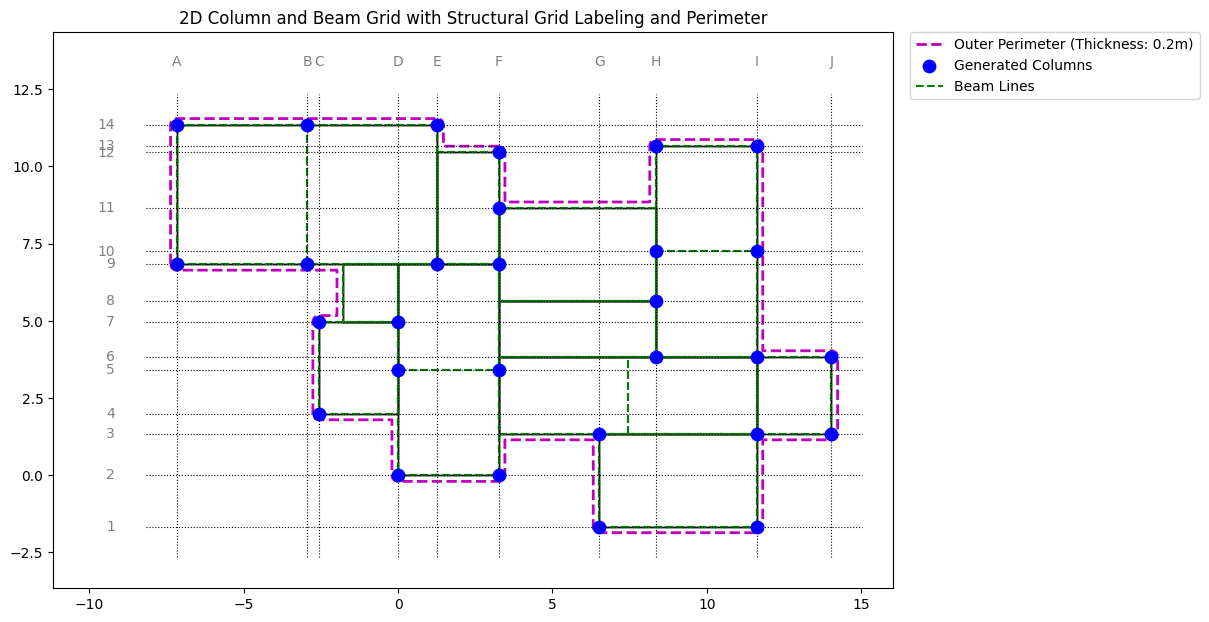

--- Generating data and Exporting CSVs & JSONs ---
Ensuring directory exists: c:\Users\papad\Documents\GitHub\Octopusie\eleftheriaexperiment\structural_data
✅ nodes.csv written to ..\eleftheriaexperiment\structural_data\nodes.csv
✅ nodes.json written to ..\eleftheriaexperiment\structural_data\nodes.json
✅ columns.csv written to ..\eleftheriaexperiment\structural_data\columns.csv
✅ columns.json written to ..\eleftheriaexperiment\structural_data\columns.json
✅ beams.csv written to ..\eleftheriaexperiment\structural_data\beams.csv
✅ beams.json written to ..\eleftheriaexperiment\structural_data\beams.json


In [10]:
import rhino3dm
import os
import numpy as np
from shapely.geometry import Polygon, Point, MultiPolygon, LineString
import matplotlib.pyplot as plt
import csv
import pandas as pd
from collections import OrderedDict
import json

# File path
rhino_path = r"C:\Users\papad\Documents\GitHub\Octopusie\Reference Files\TALLERWALLFAIL.3dm"
if not os.path.exists(rhino_path):
    raise FileNotFoundError(f"File not found: {rhino_path}")

# Load model
model = rhino3dm.File3dm.Read(rhino_path)

# Extract geometries and their bounding boxes
building_floor_footprints = [] # For generating columns/beams based on horizontal extent
all_mesh_bboxes = [] # To store all mesh bounding boxes for height lookups (walls and floors)
roof_meshes_info = [] # NEW: To store info specifically for roof-like meshes
max_z = 0.0

# Define a small tolerance for "flatness" or "thinness" in Z
Z_FLATNESS_TOLERANCE = 0.1 # Adjust this value if your floor slabs are thicker/thinner
# WALL_THICKNESS_TOLERANCE = 0.5 # Removed, not needed for new logic

for obj in model.Objects:
    geom = obj.Geometry
    if geom.ObjectType == rhino3dm.ObjectType.Mesh:
        bbox = geom.GetBoundingBox()
        
        # Calculate 2D dimensions of the bounding box
        bbox_x_dim = bbox.Max.X - bbox.Min.X
        bbox_y_dim = bbox.Max.Y - bbox.Min.Y
        bbox_z_dim = bbox.Max.Z - bbox.Min.Z

        # Only consider meshes that are "flat" in Z (like floor slabs or ground planes)
        if bbox_z_dim < Z_FLATNESS_TOLERANCE and bbox_x_dim > 0.1 and bbox_y_dim > 0.1:
            base_pts = [
                [bbox.Min.X, bbox.Min.Y],
                [bbox.Max.X, bbox.Min.Y],
                [bbox.Max.X, bbox.Max.Y],
                [bbox.Min.X, bbox.Max.Y],
                [bbox.Min.X, bbox.Min.Y] # Close polygon
            ]
            poly = Polygon(base_pts)
            if poly.area > 1e-3: # Ensure it's a valid polygon with area
                building_floor_footprints.append(poly)
            
            # NEW SECTION: Also identify "Roof-like" meshes for later comparison
            # A roof is also flat in Z, but we specifically care about its Max.Z
            # Store a tuple: (Rhino Object ID, Bounding Box, 2D Footprint at Max.Z)
            roof_meshes_info.append((obj.Attributes.Id, bbox, poly)) # Using poly as 2D footprint

        # Store all mesh bounding boxes for height lookups later, regardless of their 2D area.
        all_mesh_bboxes.append(bbox)
        
        max_z = max(max_z, bbox.Max.Z) # Global max Z for any geometry

if not building_floor_footprints:
    raise RuntimeError("No meaningful building floor footprints (meshes flat in Z with area) found in the model.")

print(f"Detected {len(building_floor_footprints)} building floor footprints. Max Z height: {max_z:.2f}m")
print(f"Total meshes contributing to height calculation: {len(all_mesh_bboxes)}")
print(f"Detected {len(roof_meshes_info)} potential roof meshes for comparison.")


# NEW SECTION: Find and print roofs that are peaks (taller than all directly touching roofs)

print("\n--- Analyzing Roof Heights ---")

# Define a small buffer for intersection checks to account for slight gaps or overlaps
INTERSECTION_BUFFER_ROOF = 0.1 # A bit larger buffer for roofs to ensure adjacency is caught

dominant_roofs_identified = []

# Loop through each identified roof mesh
for i, (roof1_id, roof1_bbox, roof1_poly_2d) in enumerate(roof_meshes_info):
    roof1_max_z = roof1_bbox.Max.Z
    is_dominant_roof = True # Assume it's dominant until proven otherwise
    touching_lower_neighbors = []
    touching_equal_or_higher_neighbors = []

    # Compare roof1 with all other roof meshes
    for j, (roof2_id, roof2_bbox, roof2_poly_2d) in enumerate(roof_meshes_info):
        if i == j: # Don't compare a roof with itself
            continue

        roof2_max_z = roof2_bbox.Max.Z

        # Check for 2D adjacency
        # We need to make sure they are actually touching or overlapping, not just very close
        # Using a small buffer and then checking if the intersection has a meaningful area/length
        
        # Calculate intersection of buffered polygons
        intersection_geometry = roof1_poly_2d.buffer(INTERSECTION_BUFFER_ROOF).intersection(roof2_poly_2d.buffer(INTERSECTION_BUFFER_ROOF))
        
        # Heuristic for "touching": if the intersection is a line or polygon (not just a point or empty)
        is_touching = not intersection_geometry.is_empty and \
                      intersection_geometry.geom_type in ['LineString', 'MultiLineString', 'Polygon', 'MultiPolygon']
        
        if is_touching:
            if roof1_max_z <= roof2_max_z + 1e-6: # If roof1 is NOT strictly taller (i.e., shorter or equal)
                is_dominant_roof = False
                touching_equal_or_higher_neighbors.append({"Id": str(roof2_id), "Height": round(roof2_max_z, 3)})
                # No need to break here, we want to collect all neighbors for info
            else: # roof1 is strictly taller
                touching_lower_neighbors.append({"Id": str(roof2_id), "Height": round(roof2_max_z, 3)})
        
    # A roof is "dominant" if it has neighbors AND all those neighbors are strictly lower.
    # If touching_equal_or_higher_neighbors is empty, it means all touching neighbors were lower.
    if is_dominant_roof and (touching_lower_neighbors or touching_equal_or_higher_neighbors): # Must have at least one touching neighbor to qualify
        dominant_roofs_identified.append({
            "RhinoObjectId": str(roof1_id),
            "Height": round(roof1_max_z, 3),
            "Location_Min_X": round(roof1_bbox.Min.X, 3),
            "Location_Min_Y": round(roof1_bbox.Min.Y, 3),
            "TouchingLowerNeighbors": touching_lower_neighbors,
            "TouchingEqualOrHigherNeighbors": touching_equal_or_higher_neighbors # This should be empty for truly dominant
        })

if dominant_roofs_identified:
    print("\nRoofs identified as strictly taller than all their directly touching neighbors:")
    for roof_info in dominant_roofs_identified:
        # Filter for only those where 'TouchingEqualOrHigherNeighbors' is empty, as per strict definition
        if not roof_info['TouchingEqualOrHigherNeighbors']:
            print(f"  Roof ID: {roof_info['RhinoObjectId']} (Height: {roof_info['Height']}m)")
            print(f"    Location (Min XY): ({roof_info['Location_Min_X']}, {roof_info['Location_Min_Y']})")
            if roof_info['TouchingLowerNeighbors']:
                neighbor_details = ", ".join([f"ID: {n['Id']} (H: {n['Height']}m)" for n in roof_info['TouchingLowerNeighbors']])
                print(f"    Touching Lower Neighbors: {neighbor_details}")
            else:
                print(f"    No directly touching lower neighbors found (might be isolated or higher than implied).")
else:
    print("\nNo roofs found that are strictly taller than all their directly touching neighbors.")


# Ask for number of floors
while True:
    try:
        num_floors = int(input("How many floors does the building have? (e.g., 2 for ground + 1 middle + roof): "))
        if num_floors < 1:
            raise ValueError
        break
    except ValueError:
        print("Please enter a valid positive integer for the number of floors.")

# --- Section for perimeter line and wall thickness ---
while True:
    try:
        wall_thickness = float(input("Enter desired wall thickness for the perimeter (e.g., 0.3): "))
        if wall_thickness <= 0:
            raise ValueError
        break
    except ValueError:
        print("Please enter a valid positive number for wall thickness.")

# Combine all building polygons into a single MultiPolygon
# Use building_floor_footprints for this as they represent the horizontal extent
combined_building_polygon = MultiPolygon(building_floor_footprints)

# Get the exterior boundary of the combined building and offset it
try:
    exterior_perimeter = combined_building_polygon.buffer(wall_thickness, join_style=1) # join_style=1 for mitered joints
except Exception as e:
    print(f"Could not buffer the building outline. Error: {e}")
    exterior_perimeter = None

# If the buffer operation results in a MultiPolygon, get the largest component
if exterior_perimeter and exterior_perimeter.geom_type == 'MultiPolygon':
    exterior_perimeter = max(exterior_perimeter.geoms, key=lambda p: p.area)

perimeter_line_coords = []
if exterior_perimeter:
    if exterior_perimeter.geom_type == 'Polygon':
        # Extract the exterior ring coordinates
        perimeter_line_coords = list(exterior_perimeter.exterior.coords)
    elif exterior_perimeter.geom_type == 'MultiPolygon':
        # For MultiPolygon, take the exterior of the largest polygon component
        perimeter_line_coords = list(exterior_perimeter.geoms[0].exterior.coords)
    else:
        print("Warning: The buffered perimeter is not a Polygon or MultiPolygon. Cannot extract line coordinates.")

# --- End perimeter section ---

# Room sorting - use building_floor_footprints here
detected_rooms = sorted([(poly, poly.area) for poly in building_floor_footprints], key=lambda x: -x[1])
if not detected_rooms:
    raise RuntimeError("No valid rooms detected after filtering by area. Check your Rhino model geometry.")


# Structural logic
MaxS = 6.0
MinS = 3.0

columns = []
beams = []

# Keep a set of added column (x,y) tuples to avoid duplicates across rooms
added_column_xy = set()

for room_poly, _ in detected_rooms:
    minx, miny, maxx, maxy = room_poly.bounds
    width, height = maxx - minx, maxy - miny
    
    # Ensure divisions are at least 1 for small rooms, but prefer MinS/MaxS
    divisions_x = max(1, int(np.ceil(width / MaxS)))
    divisions_y = max(1, int(np.ceil(height / MaxS)))
    
    # Calculate spacing to distribute columns somewhat evenly
    spacing_x = width / divisions_x if divisions_x > 0 else width
    spacing_y = height / divisions_y if divisions_y > 0 else height

    x_points = np.linspace(minx, maxx, divisions_x + 1)
    y_points = np.linspace(miny, maxy, divisions_y + 1)
    
    # Add interior grid columns
    for x in x_points:
        for y in y_points:
            col_pt = Point(x, y)
            # Only add if inside the room polygon (or very close to boundary)
            if room_poly.contains(col_pt) or room_poly.buffer(1e-6).contains(col_pt): # Add a small buffer for boundary points
                if all(np.linalg.norm(np.array((x, y)) - np.array(exist_col_xy)) >= MinS for exist_col_xy in added_column_xy):
                    columns.append((x, y))
                    added_column_xy.add((x, y))

    # Add columns at corners of the room polygon
    for corner_x, corner_y in room_poly.exterior.coords:
        corner_pt = (corner_x, corner_y)
        # Check if this corner is far enough from already placed columns
        if all(np.linalg.norm(np.array(corner_pt) - np.array(exist_col_xy)) >= MinS * 0.5 for exist_col_xy in added_column_xy):
            columns.append(corner_pt)
            added_column_xy.add(corner_pt)


    # Beam generation: Only generate beams that are *within* the room polygon
    for x in x_points:
        candidate_line = LineString([(x, miny), (x, maxy)])
        intersection = room_poly.intersection(candidate_line)
        if intersection.geom_type == 'LineString' and intersection.length > 1e-3: # Ensure it's a meaningful line
            beams.append((intersection.coords[0], intersection.coords[1]))
        elif intersection.geom_type == 'MultiLineString':
            for line in intersection.geoms:
                if line.length > 1e-3:
                    beams.append((line.coords[0], line.coords[1]))

    for y in y_points:
        candidate_line = LineString([(minx, y), (maxx, y)])
        intersection = room_poly.intersection(candidate_line)
        if intersection.geom_type == 'LineString' and intersection.length > 1e-3:
            beams.append((intersection.coords[0], intersection.coords[1]))
        elif intersection.geom_type == 'MultiLineString':
            for line in intersection.geoms:
                if line.length > 1e-3:
                    beams.append((line.coords[0], line.coords[1]))

# Combine all base columns (ensure uniqueness if needed, but the logic above should handle it)
all_base_columns = list(added_column_xy) # Convert set back to list for further processing

# --- COLUMN GRID NUMBERING LOGIC (remains largely the same) ---
# Get unique X and Y coordinates from all generated/snapped columns for grid lines
grid_xs = sorted(list(set([col[0] for col in all_base_columns])))
grid_ys = sorted(list(set([col[1] for col in all_base_columns])))

# Create mapping for X-coordinates to letters (A, B, C...)
x_grid_labels = {x: chr(65 + i) for i, x in enumerate(grid_xs)}
# Create mapping for Y-coordinates to numbers (1, 2, 3...)
y_grid_labels = {y: i + 1 for i, y in enumerate(grid_ys)}

# Determine the actual min/max X/Y of the columns for drawing grid lines
col_min_x_extent = min(col[0] for col in all_base_columns) if all_base_columns else 0
col_max_x_extent = max(col[0] for col in all_base_columns) if all_base_columns else 0
col_min_y_extent = min(col[1] for col in all_base_columns) if all_base_columns else 0
col_max_y_extent = max(col[1] for col in all_base_columns) if all_base_columns else 0

# Add a small buffer to the column extents for drawing grid lines
grid_extent_buffer = 1.0 # Adjusted for better visual spacing
col_min_x_extent -= grid_extent_buffer
col_max_x_extent += grid_extent_buffer
col_min_y_extent -= grid_extent_buffer
col_max_y_extent += grid_extent_buffer

# Determine overall plot limits (consider building outline and grid labels)
min_x_plot = min(col_min_x_extent, min([coord[0] for coord in perimeter_line_coords] + [col[0] for col in all_base_columns])) - 3.0 if perimeter_line_coords else col_min_x_extent - 3.0
max_x_plot = max(col_max_x_extent, max([coord[0] for coord in perimeter_line_coords] + [col[0] for col in all_base_columns])) + 1.0 if perimeter_line_coords else col_max_x_extent + 1.0
min_y_plot = min(col_min_y_extent, min([coord[1] for coord in perimeter_line_coords] + [col[1] for col in all_base_columns])) - 1.0 if perimeter_line_coords else col_min_y_extent - 1.0
max_y_plot = max(col_max_y_extent, max([coord[1] for coord in perimeter_line_coords] + [col[1] for col in all_base_columns])) + 2.0 if perimeter_line_coords else col_max_y_extent + 2.0


# 2D Visualization
fig, ax = plt.subplots(figsize=(12, 10)) # Increased figure width for legend

# Room outlines
for poly, _ in detected_rooms:
    px, py = poly.exterior.xy
    ax.plot(px, py, 'k-', linewidth=1)

# Plot the new perimeter line
if perimeter_line_coords:
    px_perimeter, py_perimeter = zip(*perimeter_line_coords)
    ax.plot(px_perimeter, py_perimeter, 'm--', linewidth=2, label=f'Outer Perimeter (Thickness: {wall_thickness}m)')

# Plot all columns
gx, gy = zip(*columns)
ax.scatter(gx, gy, c='blue', s=80, label='Generated Columns', zorder=5)

# Only draw one label for beam lines in 2D
if beams:
    first_beam_plotted = False
    for (x1, y1), (x2, y2) in beams:
        if not first_beam_plotted:
            ax.plot([x1, x2], [y1, y2], color='green', linestyle='--', linewidth=1.5, label='Beam Lines')
            first_beam_plotted = True
        else:
            ax.plot([x1, x2], [y1, y2], color='green', linestyle='--', linewidth=1.5)


# Draw and label grid lines
for x_coord in grid_xs:
    ax.plot([x_coord, x_coord], [col_min_y_extent, col_max_y_extent], 'k:', linewidth=0.8) # Dashed vertical grid line
    ax.text(x_coord, col_max_y_extent + 0.8, x_grid_labels[x_coord], ha='center', va='bottom', fontsize=10, color='gray') # Label at top

for y_coord in grid_ys:
    ax.plot([col_min_x_extent, col_max_x_extent], [y_coord, y_coord], 'k:', linewidth=0.8) # Dashed horizontal grid line
    ax.text(col_min_x_extent - 1.0, y_coord, y_grid_labels[y_coord], ha='right', va='center', fontsize=10, color='gray') # Label on left


ax.set_aspect('equal', 'box')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.) # Moved legend
plt.title("2D Column and Beam Grid with Structural Grid Labeling and Perimeter")

plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)

ax.set_xlim(min_x_plot, max_x_plot)
ax.set_ylim(min_y_plot, max_y_plot)
plt.show()


# --- Utility function for wall height (IMPROVED) ---
def get_wall_height(x, y, mesh_bboxes, global_max_z):
    pt = Point(x, y)
    
    # Find all bounding boxes whose XY footprint contains or is very close to the point
    relevant_bboxes = []
    for bbox in mesh_bboxes:
        # Create a 2D polygon from the bbox base
        bbox_poly = Polygon([
            [bbox.Min.X, bbox.Min.Y],
            [bbox.Max.X, bbox.Min.Y],
            [bbox.Max.X, bbox.Max.Y],
            [bbox.Min.X, bbox.Max.Y],
            [bbox.Min.X, bbox.Min.Y]
        ])
        # Use a small buffer for numerical robustness when point is on a boundary
        if bbox_poly.buffer(1e-4).contains(pt):
            relevant_bboxes.append(bbox)

    if not relevant_bboxes:
        return global_max_z 

    max_relevant_z = 0.0
    for bbox in relevant_bboxes:
        max_relevant_z = max(max_relevant_z, bbox.Max.Z)
        
    return max_relevant_z if max_relevant_z > 0 else global_max_z


# --- DATA GENERATION AND CSV/JSON EXPORT ---
print("--- Generating data and Exporting CSVs & JSONs ---")

# Define the relative path for saving files
EXPORT_SAVE_PATH = r"..\eleftheriaexperiment\structural_data"

# Create the target directory if it doesn't exist
os.makedirs(EXPORT_SAVE_PATH, exist_ok=True)
print(f"Ensuring directory exists: {os.path.abspath(EXPORT_SAVE_PATH)}")

node_coords = []
node_dict = OrderedDict()

def add_node(pt):
    key = tuple(np.round(pt, 5))
    if key not in node_dict:
        node_id = f"N{len(node_dict)}"
        node_dict[key] = node_id
        node_coords.append([node_id] + list(key))
    return node_dict[key]

# Ensure column_lines and beam_lines are populated based on the processed data
column_lines = []
for x, y in all_base_columns:
    current_column_max_z = get_wall_height(x, y, all_mesh_bboxes, max_z)
    
    for i in range(num_floors + 1):
        z_level = (i / num_floors) * current_column_max_z if num_floors > 0 else current_column_max_z
        z_level = max(0, z_level) 

        if i == 0:
            id_btm_ground = add_node((x, y, 0))
            if num_floors == 0:
                pass 
            elif num_floors > 0:
                id_first_floor = add_node((x, y, z_level))
                if z_level > 1e-6:
                    column_lines.append((id_btm_ground, id_first_floor))
        elif i > 0:
            prev_z_level = ((i-1) / num_floors) * current_column_max_z if num_floors > 0 else 0
            
            actual_z_level = min(z_level, current_column_max_z)
            actual_prev_z_level = min(prev_z_level, current_column_max_z)

            if actual_z_level > actual_prev_z_level + 1e-6 and actual_z_level <= current_column_max_z + 1e-6: 
                id_prev_node = add_node((x, y, actual_prev_z_level))
                id_current_node = add_node((x, y, actual_z_level))
                column_lines.append((id_prev_node, id_current_node))


beam_lines = []
unique_beam_tuples = set() 

for (x1, y1), (x2, y2) in beams:
    mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
    segment_max_z_for_height = get_wall_height(mid_x, mid_y, all_mesh_bboxes, max_z)
    
    if segment_max_z_for_height < 1e-3 and num_floors > 0:
        pass

    for i in range(1, num_floors + 1):
        z_level = (i / num_floors) * segment_max_z_for_height if num_floors > 0 else 0
        
        if num_floors > 0 and z_level < 1e-6:
              continue
        
        z_level_rounded = round(z_level, 5)

        id1 = add_node((x1, y1, z_level_rounded))
        id2 = add_node((x2, y2, z_level_rounded))
        
        ordered_nodes = tuple(sorted((id1, id2)))
        if ordered_nodes not in unique_beam_tuples:
            unique_beam_tuples.add(ordered_nodes)
            beam_lines.append((id1, id2))


# --- Export nodes.csv ---
nodes_csv_path = os.path.join(EXPORT_SAVE_PATH, "nodes.csv")
df_nodes = pd.DataFrame(node_coords, columns=["ID", "X", "Y", "Z"])
df_nodes.to_csv(nodes_csv_path, index=False)
print(f"✅ nodes.csv written to {nodes_csv_path}")

# --- Export nodes.json ---
nodes_json_path = os.path.join(EXPORT_SAVE_PATH, "nodes.json")
nodes_json_data = []
for node in node_coords:
    nodes_json_data.append({
        "ID": node[0],
        "X": node[1],
        "Y": node[2],
        "Z": node[3]
    })
with open(nodes_json_path, 'w') as f:
    json.dump(nodes_json_data, f, indent=4)
print(f"✅ nodes.json written to {nodes_json_path}")

# --- Export columns.csv ---
col_data = []
for i, (i_node_id, j_node_id) in enumerate(column_lines):
    p1_coords = df_nodes[df_nodes["ID"] == i_node_id][["X", "Y", "Z"]].values[0]
    p2_coords = df_nodes[df_nodes["ID"] == j_node_id][["X", "Y", "Z"]].values[0]
    length = np.linalg.norm(p2_coords - p1_coords)
    col_data.append([f"C{i}", i_node_id, j_node_id, round(length, 3)])

columns_csv_path = os.path.join(EXPORT_SAVE_PATH, "columns.csv")
df_columns = pd.DataFrame(col_data, columns=["ID", "i_node", "j_node", "length"])
df_columns.to_csv(columns_csv_path, index=False)
print(f"✅ columns.csv written to {columns_csv_path}")

# --- Export columns.json ---
columns_json_path = os.path.join(EXPORT_SAVE_PATH, "columns.json")
columns_json_data = []
for i, (i_node_id, j_node_id) in enumerate(column_lines):
    columns_json_data.append({
        "ID": f"C{i}",
        "i_node": i_node_id,
        "j_node": j_node_id,
        "length": round(np.linalg.norm(df_nodes[df_nodes["ID"] == j_node_id][["X", "Y", "Z"]].values[0] - \
                                         df_nodes[df_nodes["ID"] == i_node_id][["X", "Y", "Z"]].values[0]), 3)
    })
with open(columns_json_path, 'w') as f:
    json.dump(columns_json_data, f, indent=4)
print(f"✅ columns.json written to {columns_json_path}")


# --- Export beams.csv ---
beam_data = []
for i, (i_node_id, j_node_id) in enumerate(beam_lines):
    p1_coords = df_nodes[df_nodes["ID"] == i_node_id][["X", "Y", "Z"]].values[0]
    p2_coords = df_nodes[df_nodes["ID"] == j_node_id][["X", "Y", "Z"]].values[0]
    length = np.linalg.norm(p2_coords - p1_coords)
    beam_data.append([f"B{i}", i_node_id, j_node_id, round(length, 3)])

beams_csv_path = os.path.join(EXPORT_SAVE_PATH, "beams.csv")
df_beams = pd.DataFrame(beam_data, columns=["ID", "i_node", "j_node", "length"])
df_beams.to_csv(beams_csv_path, index=False)
print(f"✅ beams.csv written to {beams_csv_path}")

# --- Export beams.json ---
beams_json_path = os.path.join(EXPORT_SAVE_PATH, "beams.json")
beams_json_data = []
for i, (i_node_id, j_node_id) in enumerate(beam_lines):
    beams_json_data.append({
        "ID": f"B{i}",
        "i_node": i_node_id,
        "j_node": j_node_id,
        "length": round(np.linalg.norm(df_nodes[df_nodes["ID"] == j_node_id][["X", "Y", "Z"]].values[0] - \
                                         df_nodes[df_nodes["ID"] == i_node_id][["X", "Y", "Z"]].values[0]), 3)
    })
with open(beams_json_path, 'w') as f:
    json.dump(beams_json_data, f, indent=4)
print(f"✅ beams.json written to {beams_json_path}")

Detected 22 building floor footprints. Max Z height: 10.28m
Total meshes contributing to height calculation: 66
Detected 22 potential roof meshes for comparison.

--- Analyzing Roof Heights ---

Roofs identified as strictly taller than all their directly touching neighbors:
  Roof ID: ce5e7c1d-4001-4d80-9630-9755d3d3007a (Height: 10.278m)
    Location (Min XY): (3.26, 5.642)
    Touching Lower Neighbors: ID: b0d24cd4-d506-4d9f-a218-9ee62df1bcd2 (H: 0.0m), ID: 64539dcd-0ee0-4320-b7d8-16b83350d499 (H: 6.0m), ID: 2e21d56f-ac70-4278-8d8d-949e523537ad (H: 0.0m), ID: f061e0e4-18dc-4157-8ba8-f687e5e0ad63 (H: 6.0m), ID: df7f528c-0cbc-40db-84e9-7adc5a44c0ab (H: 0.0m), ID: 16094e2e-db99-4b80-83d2-1c312ae95472 (H: 6.0m), ID: 57f085ba-0eb8-4b32-bd90-4cc10445ce32 (H: 0.0m), ID: db45a292-5351-46f7-8271-8a616219b70e (H: 6.0m), ID: ce6544ee-c3e5-4337-af31-2342daa834c0 (H: 0.0m)

--- Forcing columns at dominant roof corners ---
  Forced column at dominant roof corner: (3.26047, 5.64173)
  Forced column

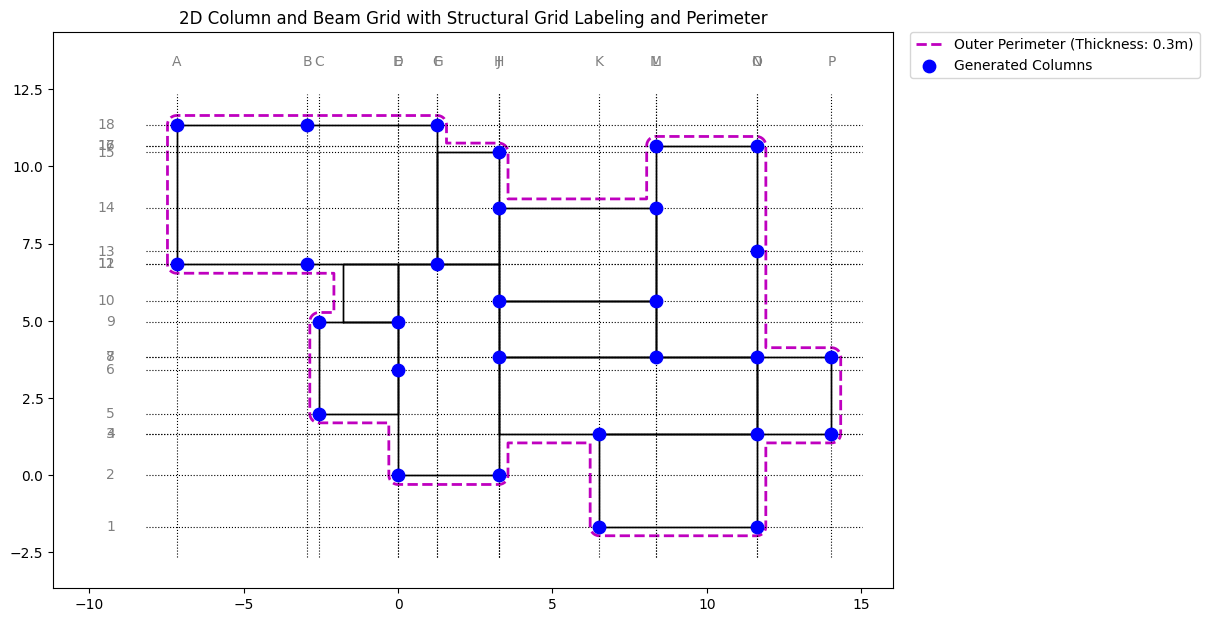

--- Generating data and Exporting CSVs & JSONs ---
Ensuring directory exists: c:\Users\papad\Documents\GitHub\Octopusie\eleftheriaexperiment\structural_data
✅ nodes.csv written to ..\eleftheriaexperiment\structural_data\nodes.csv
✅ nodes.json written to ..\eleftheriaexperiment\structural_data\nodes.json
✅ columns.csv written to ..\eleftheriaexperiment\structural_data\columns.csv
✅ columns.json written to ..\eleftheriaexperiment\structural_data\columns.json
✅ beams.csv written to ..\eleftheriaexperiment\structural_data\beams.csv
✅ beams.json written to ..\eleftheriaexperiment\structural_data\beams.json


In [11]:
import rhino3dm
import os
import numpy as np
from shapely.geometry import Polygon, Point, MultiPolygon, LineString
import matplotlib.pyplot as plt
import csv
import pandas as pd
from collections import OrderedDict
import json

# File path
rhino_path = r"C:\Users\papad\Documents\GitHub\Octopusie\Reference Files\TALLERWALLFAIL.3dm"
if not os.path.exists(rhino_path):
    raise FileNotFoundError(f"File not found: {rhino_path}")

# Load model
model = rhino3dm.File3dm.Read(rhino_path)

# Extract geometries and their bounding boxes
building_floor_footprints = [] # For generating columns/beams based on horizontal extent
all_mesh_bboxes = [] # To store all mesh bounding boxes for height lookups (walls and floors)
roof_meshes_info = [] # To store info specifically for roof-like meshes
max_z = 0.0

# Define a small tolerance for "flatness" or "thinness" in Z
Z_FLATNESS_TOLERANCE = 0.1 # Adjust this value if your floor slabs are thicker/thinner

for obj in model.Objects:
    geom = obj.Geometry
    if geom.ObjectType == rhino3dm.ObjectType.Mesh:
        bbox = geom.GetBoundingBox()
        
        # Calculate 2D dimensions of the bounding box
        bbox_x_dim = bbox.Max.X - bbox.Min.X
        bbox_y_dim = bbox.Max.Y - bbox.Min.Y
        bbox_z_dim = bbox.Max.Z - bbox.Min.Z

        # Only consider meshes that are "flat" in Z (like floor slabs or ground planes)
        if bbox_z_dim < Z_FLATNESS_TOLERANCE and bbox_x_dim > 0.1 and bbox_y_dim > 0.1:
            base_pts = [
                [bbox.Min.X, bbox.Min.Y],
                [bbox.Max.X, bbox.Min.Y],
                [bbox.Max.X, bbox.Max.Y],
                [bbox.Min.X, bbox.Max.Y],
                [bbox.Min.X, bbox.Min.Y] # Close polygon
            ]
            poly = Polygon(base_pts)
            if poly.area > 1e-3: # Ensure it's a valid polygon with area
                building_floor_footprints.append(poly)
            
                # Identify "Roof-like" meshes for later comparison based on their top Z
                roof_meshes_info.append((obj.Attributes.Id, bbox, poly))

        # Store all mesh bounding boxes for height lookups later, regardless of their 2D area.
        all_mesh_bboxes.append(bbox)
        
        max_z = max(max_z, bbox.Max.Z) # Global max Z for any geometry

if not building_floor_footprints:
    raise RuntimeError("No meaningful building floor footprints (meshes flat in Z with area) found in the model.")

print(f"Detected {len(building_floor_footprints)} building floor footprints. Max Z height: {max_z:.2f}m")
print(f"Total meshes contributing to height calculation: {len(all_mesh_bboxes)}")
print(f"Detected {len(roof_meshes_info)} potential roof meshes for comparison.")


# Find and print roofs that are peaks (taller than all directly touching roofs)

print("\n--- Analyzing Roof Heights ---")

# Define a small buffer for intersection checks to account for slight gaps or overlaps
INTERSECTION_BUFFER_ROOF = 0.1 # A bit larger buffer for roofs to ensure adjacency is caught

dominant_roofs_identified = []

# Loop through each identified roof mesh
for i, (roof1_id, roof1_bbox, roof1_poly_2d) in enumerate(roof_meshes_info):
    roof1_max_z = roof1_bbox.Max.Z
    is_dominant_roof = True # Assume it's dominant until proven otherwise
    touching_lower_neighbors = []
    touching_equal_or_higher_neighbors = []

    # Compare roof1 with all other roof meshes
    for j, (roof2_id, roof2_bbox, roof2_poly_2d) in enumerate(roof_meshes_info):
        if i == j: # Don't compare a roof with itself
            continue

        roof2_max_z = roof2_bbox.Max.Z

        # Check for 2D adjacency
        intersection_geometry = roof1_poly_2d.buffer(INTERSECTION_BUFFER_ROOF).intersection(roof2_poly_2d.buffer(INTERSECTION_BUFFER_ROOF))
        
        is_touching = not intersection_geometry.is_empty and \
                      intersection_geometry.geom_type in ['LineString', 'MultiLineString', 'Polygon', 'MultiPolygon']
        
        if is_touching:
            if roof1_max_z <= roof2_max_z + 1e-6: # If roof1 is NOT strictly taller (i.e., shorter or equal)
                is_dominant_roof = False
                touching_equal_or_higher_neighbors.append({"Id": str(roof2_id), "Height": round(roof2_max_z, 3)})
            else: # roof1 is strictly taller
                touching_lower_neighbors.append({"Id": str(roof2_id), "Height": round(roof2_max_z, 3)})
        
    # A roof is "dominant" if it has neighbors AND all those neighbors are strictly lower.
    if is_dominant_roof and (touching_lower_neighbors or touching_equal_or_higher_neighbors):
        dominant_roofs_identified.append({
            "RhinoObjectId": str(roof1_id),
            "Height": round(roof1_max_z, 3),
            "Location_Min_X": round(roof1_bbox.Min.X, 3),
            "Location_Min_Y": round(roof1_bbox.Min.Y, 3),
            "Polygon": roof1_poly_2d, # Store the polygon for later corner extraction
            "TouchingLowerNeighbors": touching_lower_neighbors,
            "TouchingEqualOrHigherNeighbors": touching_equal_or_higher_neighbors
        })

if dominant_roofs_identified:
    print("\nRoofs identified as strictly taller than all their directly touching neighbors:")
    for roof_info in dominant_roofs_identified:
        if not roof_info['TouchingEqualOrHigherNeighbors']:
            print(f"  Roof ID: {roof_info['RhinoObjectId']} (Height: {roof_info['Height']}m)")
            print(f"    Location (Min XY): ({roof_info['Location_Min_X']}, {roof_info['Location_Min_Y']})")
            if roof_info['TouchingLowerNeighbors']:
                neighbor_details = ", ".join([f"ID: {n['Id']} (H: {n['Height']}m)" for n in roof_info['TouchingLowerNeighbors']])
                print(f"    Touching Lower Neighbors: {neighbor_details}")
            else:
                print(f"    No directly touching lower neighbors found (might be isolated or higher than implied).")
else:
    print("\nNo roofs found that are strictly taller than all their directly touching neighbors.")


# Ask for number of floors
while True:
    try:
        num_floors = int(input("How many floors does the building have? (e.g., 2 for ground + 1 middle + roof): "))
        if num_floors < 1:
            raise ValueError
        break
    except ValueError:
        print("Please enter a valid positive integer for the number of floors.")

# --- Section for perimeter line and wall thickness ---
while True:
    try:
        wall_thickness = float(input("Enter desired wall thickness for the perimeter (e.g., 0.3): "))
        if wall_thickness <= 0:
            raise ValueError
        break
    except ValueError:
        print("Please enter a valid positive number for wall thickness.")

# Combine all building polygons into a single MultiPolygon
combined_building_polygon = MultiPolygon(building_floor_footprints)

# Get the exterior boundary of the combined building and offset it
try:
    exterior_perimeter = combined_building_polygon.buffer(wall_thickness, join_style=1)
except Exception as e:
    print(f"Could not buffer the building outline. Error: {e}")
    exterior_perimeter = None

if exterior_perimeter and exterior_perimeter.geom_type == 'MultiPolygon':
    exterior_perimeter = max(exterior_perimeter.geoms, key=lambda p: p.area)

perimeter_line_coords = []
if exterior_perimeter:
    if exterior_perimeter.geom_type == 'Polygon':
        perimeter_line_coords = list(exterior_perimeter.exterior.coords)
    elif exterior_perimeter.geom_type == 'MultiPolygon':
        perimeter_line_coords = list(exterior_perimeter.geoms[0].exterior.coords)
    else:
        print("Warning: The buffered perimeter is not a Polygon or MultiPolygon. Cannot extract line coordinates.")

# --- End perimeter section ---

# Room sorting - use building_floor_footprints here
detected_rooms = sorted([(poly, poly.area) for poly in building_floor_footprints], key=lambda x: -x[1])
if not detected_rooms:
    raise RuntimeError("No valid rooms detected after filtering by area. Check your Rhino model geometry.")


# Structural logic
MaxS = 6.0
MinS = 3.0

columns = []
beams = []

# Keep a set of added column (x,y) tuples to avoid duplicates across rooms
added_column_xy = set()

# NEW: Force columns at the corners of dominant roof footprints
print("\n--- Forcing columns at dominant roof corners ---")
for roof_info in dominant_roofs_identified:
    if not roof_info['TouchingEqualOrHigherNeighbors']: # Only for truly dominant roofs
        poly_2d = roof_info['Polygon']
        # Extract the corners of the rectangular footprint
        minx, miny, maxx, maxy = poly_2d.bounds
        corners_to_force = [
            (minx, miny),
            (maxx, miny),
            (maxx, maxy),
            (minx, maxy)
        ]
        for cx, cy in corners_to_force:
            rounded_cx = round(cx, 5) # Round to prevent floating point issues with set
            rounded_cy = round(cy, 5)
            if (rounded_cx, rounded_cy) not in added_column_xy:
                columns.append((rounded_cx, rounded_cy))
                added_column_xy.add((rounded_cx, rounded_cy))
                print(f"  Forced column at dominant roof corner: ({rounded_cx}, {rounded_cy})")


for room_poly, _ in detected_rooms:
    minx, miny, maxx, maxy = room_poly.bounds
    width, height = maxx - minx, maxy - miny
    
    divisions_x = max(1, int(np.ceil(width / MaxS)))
    divisions_y = max(1, int(np.ceil(height / MaxS)))
    
    spacing_x = width / divisions_x if divisions_x > 0 else width
    spacing_y = height / divisions_y if divisions_y > 0 else height

    x_points = np.linspace(minx, maxx, divisions_x + 1)
    y_points = np.linspace(miny, maxy, divisions_y + 1)
    
    # Add interior grid columns (respecting existing forced columns)
    for x in x_points:
        for y in y_points:
            col_pt = Point(x, y)
            rounded_x = round(x, 5)
            rounded_y = round(y, 5)
            
            if room_poly.contains(col_pt) or room_poly.buffer(1e-6).contains(col_pt):
                # Only add if not already added (either by force or previous iteration)
                # and satisfies the MinS distance for non-forced columns
                if (rounded_x, rounded_y) not in added_column_xy:
                    if all(np.linalg.norm(np.array((rounded_x, rounded_y)) - np.array(exist_col_xy)) >= MinS for exist_col_xy in added_column_xy):
                        columns.append((rounded_x, rounded_y))
                        added_column_xy.add((rounded_x, rounded_y))

    # Add columns at corners of the room polygon (respecting existing forced columns)
    for corner_x, corner_y in room_poly.exterior.coords:
        corner_pt = (corner_x, corner_y)
        rounded_corner_x = round(corner_x, 5)
        rounded_corner_y = round(corner_y, 5)
        
        if (rounded_corner_x, rounded_corner_y) not in added_column_xy:
            if all(np.linalg.norm(np.array(corner_pt) - np.array(exist_col_xy)) >= MinS * 0.5 for exist_col_xy in added_column_xy):
                columns.append(corner_pt)
                added_column_xy.add(corner_pt)


# Combine all base columns (ensure uniqueness if needed, but the logic above should handle it)
all_base_columns = list(added_column_xy)

# --- COLUMN GRID NUMBERING LOGIC (remains largely the same) ---
grid_xs = sorted(list(set([col[0] for col in all_base_columns])))
grid_ys = sorted(list(set([col[1] for col in all_base_columns])))

x_grid_labels = {x: chr(65 + i) for i, x in enumerate(grid_xs)}
y_grid_labels = {y: i + 1 for i, y in enumerate(grid_ys)}

col_min_x_extent = min(col[0] for col in all_base_columns) if all_base_columns else 0
col_max_x_extent = max(col[0] for col in all_base_columns) if all_base_columns else 0
col_min_y_extent = min(col[1] for col in all_base_columns) if all_base_columns else 0
col_max_y_extent = max(col[1] for col in all_base_columns) if all_base_columns else 0

grid_extent_buffer = 1.0
col_min_x_extent -= grid_extent_buffer
col_max_x_extent += grid_extent_buffer
col_min_y_extent -= grid_extent_buffer
col_max_y_extent += grid_extent_buffer

min_x_plot = min(col_min_x_extent, min([coord[0] for coord in perimeter_line_coords] + [col[0] for col in all_base_columns])) - 3.0 if perimeter_line_coords else col_min_x_extent - 3.0
max_x_plot = max(col_max_x_extent, max([coord[0] for coord in perimeter_line_coords] + [col[0] for col in all_base_columns])) + 1.0 if perimeter_line_coords else col_max_x_extent + 1.0
min_y_plot = min(col_min_y_extent, min([coord[1] for coord in perimeter_line_coords] + [col[1] for col in all_base_columns])) - 1.0 if perimeter_line_coords else col_min_y_extent - 1.0
max_y_plot = max(col_max_y_extent, max([coord[1] for coord in perimeter_line_coords] + [col[1] for col in all_base_columns])) + 2.0 if perimeter_line_coords else col_max_y_extent + 2.0


# 2D Visualization
fig, ax = plt.subplots(figsize=(12, 10))

for poly, _ in detected_rooms:
    px, py = poly.exterior.xy
    ax.plot(px, py, 'k-', linewidth=1)

if perimeter_line_coords:
    px_perimeter, py_perimeter = zip(*perimeter_line_coords)
    ax.plot(px_perimeter, py_perimeter, 'm--', linewidth=2, label=f'Outer Perimeter (Thickness: {wall_thickness}m)')

gx, gy = zip(*columns)
ax.scatter(gx, gy, c='blue', s=80, label='Generated Columns', zorder=5)

if beams:
    first_beam_plotted = False
    for (x1, y1), (x2, y2) in beams:
        if not first_beam_plotted:
            ax.plot([x1, x2], [y1, y2], color='green', linestyle='--', linewidth=1.5, label='Beam Lines')
            first_beam_plotted = True
        else:
            ax.plot([x1, x2], [y1, y2], color='green', linestyle='--', linewidth=1.5)

for x_coord in grid_xs:
    ax.plot([x_coord, x_coord], [col_min_y_extent, col_max_y_extent], 'k:', linewidth=0.8)
    ax.text(x_coord, col_max_y_extent + 0.8, x_grid_labels[x_coord], ha='center', va='bottom', fontsize=10, color='gray')

for y_coord in grid_ys:
    ax.plot([col_min_x_extent, col_max_x_extent], [y_coord, y_coord], 'k:', linewidth=0.8)
    ax.text(col_min_x_extent - 1.0, y_coord, y_grid_labels[y_coord], ha='right', va='center', fontsize=10, color='gray')

ax.set_aspect('equal', 'box')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.title("2D Column and Beam Grid with Structural Grid Labeling and Perimeter")

plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)

ax.set_xlim(min_x_plot, max_x_plot)
ax.set_ylim(min_y_plot, max_y_plot)
plt.show()


# --- Utility function for wall height ---
def get_wall_height(x, y, mesh_bboxes, global_max_z):
    pt = Point(x, y)
    relevant_bboxes = []
    for bbox in mesh_bboxes:
        bbox_poly = Polygon([
            [bbox.Min.X, bbox.Min.Y],
            [bbox.Max.X, bbox.Min.Y],
            [bbox.Max.X, bbox.Max.Y],
            [bbox.Min.X, bbox.Max.Y],
            [bbox.Min.X, bbox.Min.Y]
        ])
        if bbox_poly.buffer(1e-4).contains(pt):
            relevant_bboxes.append(bbox)

    if not relevant_bboxes:
        return global_max_z 

    max_relevant_z = 0.0
    for bbox in relevant_bboxes:
        max_relevant_z = max(max_relevant_z, bbox.Max.Z)
        
    return max_relevant_z if max_relevant_z > 0 else global_max_z


# --- DATA GENERATION AND CSV/JSON EXPORT ---
print("--- Generating data and Exporting CSVs & JSONs ---")

# Define the relative path for saving files
EXPORT_SAVE_PATH = r"..\eleftheriaexperiment\structural_data"

# Create the target directory if it doesn't exist
os.makedirs(EXPORT_SAVE_PATH, exist_ok=True)
print(f"Ensuring directory exists: {os.path.abspath(EXPORT_SAVE_PATH)}")

node_coords = []
node_dict = OrderedDict()

def add_node(pt):
    key = tuple(np.round(pt, 5))
    if key not in node_dict:
        node_id = f"N{len(node_dict)}"
        node_dict[key] = node_id
        node_coords.append([node_id] + list(key))
    return node_dict[key]

column_lines = []
for x, y in all_base_columns:
    current_column_max_z = get_wall_height(x, y, all_mesh_bboxes, max_z)
    
    for i in range(num_floors + 1):
        z_level = (i / num_floors) * current_column_max_z if num_floors > 0 else current_column_max_z
        z_level = max(0, z_level) 

        if i == 0:
            id_btm_ground = add_node((x, y, 0))
            if num_floors == 0:
                pass 
            elif num_floors > 0:
                id_first_floor = add_node((x, y, z_level))
                if z_level > 1e-6:
                    column_lines.append((id_btm_ground, id_first_floor))
        elif i > 0:
            prev_z_level = ((i-1) / num_floors) * current_column_max_z if num_floors > 0 else 0
            
            actual_z_level = min(z_level, current_column_max_z)
            actual_prev_z_level = min(prev_z_level, current_column_max_z)

            if actual_z_level > actual_prev_z_level + 1e-6 and actual_z_level <= current_column_max_z + 1e-6: 
                id_prev_node = add_node((x, y, actual_prev_z_level))
                id_current_node = add_node((x, y, actual_z_level))
                column_lines.append((id_prev_node, id_current_node))


beam_lines = []
unique_beam_tuples = set() 

for (x1, y1), (x2, y2) in beams:
    mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
    segment_max_z_for_height = get_wall_height(mid_x, mid_y, all_mesh_bboxes, max_z)
    
    if segment_max_z_for_height < 1e-3 and num_floors > 0:
        pass

    for i in range(1, num_floors + 1):
        z_level = (i / num_floors) * segment_max_z_for_height if num_floors > 0 else 0
        
        if num_floors > 0 and z_level < 1e-6:
              continue
        
        z_level_rounded = round(z_level, 5)

        id1 = add_node((x1, y1, z_level_rounded))
        id2 = add_node((x2, y2, z_level_rounded))
        
        ordered_nodes = tuple(sorted((id1, id2)))
        if ordered_nodes not in unique_beam_tuples:
            unique_beam_tuples.add(ordered_nodes)
            beam_lines.append((id1, id2))


# --- Export nodes.csv ---
nodes_csv_path = os.path.join(EXPORT_SAVE_PATH, "nodes.csv")
df_nodes = pd.DataFrame(node_coords, columns=["ID", "X", "Y", "Z"])
df_nodes.to_csv(nodes_csv_path, index=False)
print(f"✅ nodes.csv written to {nodes_csv_path}")

# --- Export nodes.json ---
nodes_json_path = os.path.join(EXPORT_SAVE_PATH, "nodes.json")
nodes_json_data = []
for node in node_coords:
    nodes_json_data.append({
        "ID": node[0],
        "X": node[1],
        "Y": node[2],
        "Z": node[3]
    })
with open(nodes_json_path, 'w') as f:
    json.dump(nodes_json_data, f, indent=4)
print(f"✅ nodes.json written to {nodes_json_path}")

# --- Export columns.csv ---
col_data = []
for i, (i_node_id, j_node_id) in enumerate(column_lines):
    p1_coords = df_nodes[df_nodes["ID"] == i_node_id][["X", "Y", "Z"]].values[0]
    p2_coords = df_nodes[df_nodes["ID"] == j_node_id][["X", "Y", "Z"]].values[0]
    length = np.linalg.norm(p2_coords - p1_coords)
    col_data.append([f"C{i}", i_node_id, j_node_id, round(length, 3)])

columns_csv_path = os.path.join(EXPORT_SAVE_PATH, "columns.csv")
df_columns = pd.DataFrame(col_data, columns=["ID", "i_node", "j_node", "length"])
df_columns.to_csv(columns_csv_path, index=False)
print(f"✅ columns.csv written to {columns_csv_path}")

# --- Export columns.json ---
columns_json_path = os.path.join(EXPORT_SAVE_PATH, "columns.json")
columns_json_data = []
for i, (i_node_id, j_node_id) in enumerate(column_lines):
    columns_json_data.append({
        "ID": f"C{i}",
        "i_node": i_node_id,
        "j_node": j_node_id,
        "length": round(np.linalg.norm(df_nodes[df_nodes["ID"] == j_node_id][["X", "Y", "Z"]].values[0] - \
                                         df_nodes[df_nodes["ID"] == i_node_id][["X", "Y", "Z"]].values[0]), 3)
    })
with open(columns_json_path, 'w') as f:
    json.dump(columns_json_data, f, indent=4)
print(f"✅ columns.json written to {columns_json_path}")


# --- Export beams.csv ---
beam_data = []
for i, (i_node_id, j_node_id) in enumerate(beam_lines):
    p1_coords = df_nodes[df_nodes["ID"] == i_node_id][["X", "Y", "Z"]].values[0]
    p2_coords = df_nodes[df_nodes["ID"] == j_node_id][["X", "Y", "Z"]].values[0]
    length = np.linalg.norm(p2_coords - p1_coords)
    beam_data.append([f"B{i}", i_node_id, j_node_id, round(length, 3)])

beams_csv_path = os.path.join(EXPORT_SAVE_PATH, "beams.csv")
df_beams = pd.DataFrame(beam_data, columns=["ID", "i_node", "j_node", "length"])
df_beams.to_csv(beams_csv_path, index=False)
print(f"✅ beams.csv written to {beams_csv_path}")

# --- Export beams.json ---
beams_json_path = os.path.join(EXPORT_SAVE_PATH, "beams.json")
beams_json_data = []
for i, (i_node_id, j_node_id) in enumerate(beam_lines):
    beams_json_data.append({
        "ID": f"B{i}",
        "i_node": i_node_id,
        "j_node": j_node_id,
        "length": round(np.linalg.norm(df_nodes[df_nodes["ID"] == j_node_id][["X", "Y", "Z"]].values[0] - \
                                         df_nodes[df_nodes["ID"] == i_node_id][["X", "Y", "Z"]].values[0]), 3)
    })
with open(beams_json_path, 'w') as f:
    json.dump(beams_json_data, f, indent=4)
print(f"✅ beams.json written to {beams_json_path}")

Detected 22 building floor footprints. Max Z height: 10.28m
Total meshes contributing to height calculation: 66
Detected 22 potential roof meshes for comparison.

--- Analyzing Roof Heights ---

Roofs identified as strictly taller than all their directly touching neighbors:
  Roof ID: ce5e7c1d-4001-4d80-9630-9755d3d3007a (Height: 10.278m)
    Location (Min XY): (3.26, 5.642)
    Touching Lower Neighbors: ID: b0d24cd4-d506-4d9f-a218-9ee62df1bcd2 (H: 0.0m), ID: 64539dcd-0ee0-4320-b7d8-16b83350d499 (H: 6.0m), ID: 2e21d56f-ac70-4278-8d8d-949e523537ad (H: 0.0m), ID: f061e0e4-18dc-4157-8ba8-f687e5e0ad63 (H: 6.0m), ID: df7f528c-0cbc-40db-84e9-7adc5a44c0ab (H: 0.0m), ID: 16094e2e-db99-4b80-83d2-1c312ae95472 (H: 6.0m), ID: 57f085ba-0eb8-4b32-bd90-4cc10445ce32 (H: 0.0m), ID: db45a292-5351-46f7-8271-8a616219b70e (H: 6.0m), ID: ce6544ee-c3e5-4337-af31-2342daa834c0 (H: 0.0m)

--- Forcing columns at dominant roof corners ---
  Forced column at dominant roof corner: (3.26047, 5.64173)
  Forced column

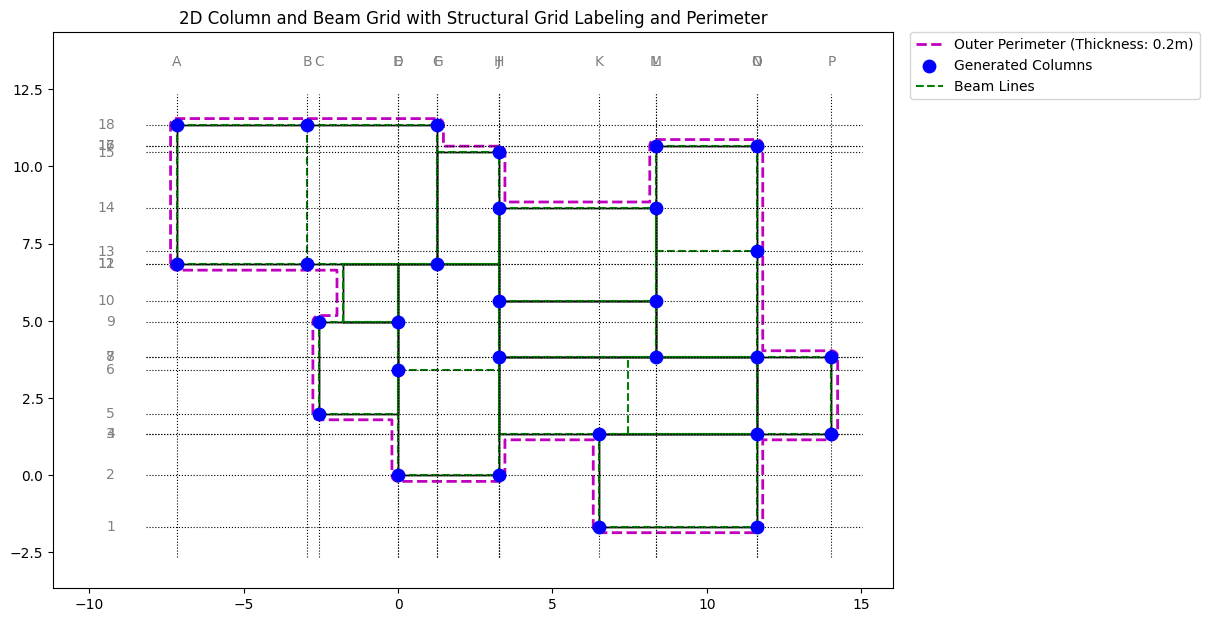

--- Generating data and Exporting CSVs & JSONs ---
Ensuring directory exists: c:\Users\papad\Documents\GitHub\Octopusie\eleftheriaexperiment\structural_data
✅ nodes.csv written to ..\eleftheriaexperiment\structural_data\nodes.csv
✅ nodes.json written to ..\eleftheriaexperiment\structural_data\nodes.json
✅ columns.csv written to ..\eleftheriaexperiment\structural_data\columns.csv
✅ columns.json written to ..\eleftheriaexperiment\structural_data\columns.json
✅ beams.csv written to ..\eleftheriaexperiment\structural_data\beams.csv
✅ beams.json written to ..\eleftheriaexperiment\structural_data\beams.json


In [ ]:
#MASHALLA FOR FORCED COLUMNS

import rhino3dm
import os
import numpy as np
from shapely.geometry import Polygon, Point, MultiPolygon, LineString
import matplotlib.pyplot as plt
import csv
import pandas as pd
from collections import OrderedDict
import json

# File path
rhino_path = r"C:\Users\papad\Documents\GitHub\Octopusie\Reference Files\TALLERWALLFAIL.3dm"
if not os.path.exists(rhino_path):
    raise FileNotFoundError(f"File not found: {rhino_path}")

# Load model
model = rhino3dm.File3dm.Read(rhino_path)

# Extract geometries and their bounding boxes
building_floor_footprints = []
all_mesh_bboxes = []
roof_meshes_info = []
max_z = 0.0

Z_FLATNESS_TOLERANCE = 0.1

for obj in model.Objects:
    geom = obj.Geometry
    if geom.ObjectType == rhino3dm.ObjectType.Mesh:
        bbox = geom.GetBoundingBox()
        
        bbox_x_dim = bbox.Max.X - bbox.Min.X
        bbox_y_dim = bbox.Max.Y - bbox.Min.Y
        bbox_z_dim = bbox.Max.Z - bbox.Min.Z

        if bbox_z_dim < Z_FLATNESS_TOLERANCE and bbox_x_dim > 0.1 and bbox_y_dim > 0.1:
            base_pts = [
                [bbox.Min.X, bbox.Min.Y],
                [bbox.Max.X, bbox.Min.Y],
                [bbox.Max.X, bbox.Max.Y],
                [bbox.Min.X, bbox.Max.Y],
                [bbox.Min.X, bbox.Min.Y]
            ]
            poly = Polygon(base_pts)
            if poly.area > 1e-3:
                building_floor_footprints.append(poly)
                roof_meshes_info.append((obj.Attributes.Id, bbox, poly))

        all_mesh_bboxes.append(bbox)
        
        max_z = max(max_z, bbox.Max.Z)

if not building_floor_footprints:
    raise RuntimeError("No meaningful building floor footprints (meshes flat in Z with area) found in the model.")

print(f"Detected {len(building_floor_footprints)} building floor footprints. Max Z height: {max_z:.2f}m")
print(f"Total meshes contributing to height calculation: {len(all_mesh_bboxes)}")
print(f"Detected {len(roof_meshes_info)} potential roof meshes for comparison.")


# Find and print roofs that are peaks (taller than all directly touching roofs)
print("\n--- Analyzing Roof Heights ---")

INTERSECTION_BUFFER_ROOF = 0.1

dominant_roofs_identified = []

for i, (roof1_id, roof1_bbox, roof1_poly_2d) in enumerate(roof_meshes_info):
    roof1_max_z = roof1_bbox.Max.Z
    is_dominant_roof = True
    touching_lower_neighbors = []
    touching_equal_or_higher_neighbors = []

    for j, (roof2_id, roof2_bbox, roof2_poly_2d) in enumerate(roof_meshes_info):
        if i == j:
            continue

        roof2_max_z = roof2_bbox.Max.Z

        intersection_geometry = roof1_poly_2d.buffer(INTERSECTION_BUFFER_ROOF).intersection(roof2_poly_2d.buffer(INTERSECTION_BUFFER_ROOF))
        
        is_touching = not intersection_geometry.is_empty and \
                      intersection_geometry.geom_type in ['LineString', 'MultiLineString', 'Polygon', 'MultiPolygon']
        
        if is_touching:
            if roof1_max_z <= roof2_max_z + 1e-6:
                is_dominant_roof = False
                touching_equal_or_higher_neighbors.append({"Id": str(roof2_id), "Height": round(roof2_max_z, 3)})
            else:
                touching_lower_neighbors.append({"Id": str(roof2_id), "Height": round(roof2_max_z, 3)})
        
    if is_dominant_roof and (touching_lower_neighbors or touching_equal_or_higher_neighbors):
        dominant_roofs_identified.append({
            "RhinoObjectId": str(roof1_id),
            "Height": round(roof1_max_z, 3),
            "Location_Min_X": round(roof1_bbox.Min.X, 3),
            "Location_Min_Y": round(roof1_bbox.Min.Y, 3),
            "Polygon": roof1_poly_2d,
            "TouchingLowerNeighbors": touching_lower_neighbors,
            "TouchingEqualOrHigherNeighbors": touching_equal_or_higher_neighbors
        })

if dominant_roofs_identified:
    print("\nRoofs identified as strictly taller than all their directly touching neighbors:")
    for roof_info in dominant_roofs_identified:
        if not roof_info['TouchingEqualOrHigherNeighbors']:
            print(f"  Roof ID: {roof_info['RhinoObjectId']} (Height: {roof_info['Height']}m)")
            print(f"    Location (Min XY): ({roof_info['Location_Min_X']}, {roof_info['Location_Min_Y']})")
            if roof_info['TouchingLowerNeighbors']:
                neighbor_details = ", ".join([f"ID: {n['Id']} (H: {n['Height']}m)" for n in roof_info['TouchingLowerNeighbors']])
                print(f"    Touching Lower Neighbors: {neighbor_details}")
            else:
                print(f"    No directly touching lower neighbors found (might be isolated or higher than implied).")
else:
    print("\nNo roofs found that are strictly taller than all their directly touching neighbors.")


# Ask for number of floors
while True:
    try:
        num_floors = int(input("How many floors does the building have? (e.g., 2 for ground + 1 middle + roof): "))
        if num_floors < 1:
            raise ValueError
        break
    except ValueError:
        print("Please enter a valid positive integer for the number of floors.")

# --- Section for perimeter line and wall thickness ---
while True:
    try:
        wall_thickness = float(input("Enter desired wall thickness for the perimeter (e.g., 0.3): "))
        if wall_thickness <= 0:
            raise ValueError
        break
    except ValueError:
        print("Please enter a valid positive number for wall thickness.")

combined_building_polygon = MultiPolygon(building_floor_footprints)

try:
    exterior_perimeter = combined_building_polygon.buffer(wall_thickness, join_style=1)
except Exception as e:
    print(f"Could not buffer the building outline. Error: {e}")
    exterior_perimeter = None

if exterior_perimeter and exterior_perimeter.geom_type == 'MultiPolygon':
    exterior_perimeter = max(exterior_perimeter.geoms, key=lambda p: p.area)

perimeter_line_coords = []
if exterior_perimeter:
    if exterior_perimeter.geom_type == 'Polygon':
        perimeter_line_coords = list(exterior_perimeter.exterior.coords)
    elif exterior_perimeter.geom_type == 'MultiPolygon':
        perimeter_line_coords = list(exterior_perimeter.geoms[0].exterior.coords)
    else:
        print("Warning: The buffered perimeter is not a Polygon or MultiPolygon. Cannot extract line coordinates.")

# --- End perimeter section ---

detected_rooms = sorted([(poly, poly.area) for poly in building_floor_footprints], key=lambda x: -x[1])
if not detected_rooms:
    raise RuntimeError("No valid rooms detected after filtering by area. Check your Rhino model geometry.")


# Structural logic
MaxS = 6.0
MinS = 3.0

columns_2d_points = [] # Store raw (x,y) points for columns
beams_2d_lines = []    # Store raw ((x1,y1),(x2,y2)) for beams for 2D plot

added_column_xy = set()

# Force columns at the corners of dominant roof footprints
print("\n--- Forcing columns at dominant roof corners ---")
for roof_info in dominant_roofs_identified:
    if not roof_info['TouchingEqualOrHigherNeighbors']:
        poly_2d = roof_info['Polygon']
        minx, miny, maxx, maxy = poly_2d.bounds
        corners_to_force = [
            (minx, miny),
            (maxx, miny),
            (maxx, maxy),
            (minx, maxy)
        ]
        for cx, cy in corners_to_force:
            rounded_cx = round(cx, 5)
            rounded_cy = round(cy, 5)
            if (rounded_cx, rounded_cy) not in added_column_xy:
                columns_2d_points.append((rounded_cx, rounded_cy))
                added_column_xy.add((rounded_cx, rounded_cy))
                print(f"  Forced column at dominant roof corner: ({rounded_cx}, {rounded_cy})")


for room_poly, _ in detected_rooms:
    minx, miny, maxx, maxy = room_poly.bounds
    width, height = maxx - minx, maxy - miny
    
    divisions_x = max(1, int(np.ceil(width / MaxS)))
    divisions_y = max(1, int(np.ceil(height / MaxS)))
    
    x_points_grid = np.linspace(minx, maxx, divisions_x + 1)
    y_points_grid = np.linspace(miny, maxy, divisions_y + 1)
    
    # Add interior grid columns
    for x in x_points_grid:
        for y in y_points_grid:
            col_pt = Point(x, y)
            rounded_x = round(x, 5)
            rounded_y = round(y, 5)
            
            if room_poly.contains(col_pt) or room_poly.buffer(1e-6).contains(col_pt):
                if (rounded_x, rounded_y) not in added_column_xy:
                    if all(np.linalg.norm(np.array((rounded_x, rounded_y)) - np.array(exist_col_xy)) >= MinS for exist_col_xy in added_column_xy):
                        columns_2d_points.append((rounded_x, rounded_y))
                        added_column_xy.add((rounded_x, rounded_y))

    # Add columns at corners of the room polygon
    for corner_x, corner_y in room_poly.exterior.coords:
        corner_pt = (corner_x, corner_y)
        rounded_corner_x = round(corner_x, 5)
        rounded_corner_y = round(corner_y, 5)
        
        if (rounded_corner_x, rounded_corner_y) not in added_column_xy:
            if all(np.linalg.norm(np.array(corner_pt) - np.array(exist_col_xy)) >= MinS * 0.5 for exist_col_xy in added_column_xy):
                columns_2d_points.append(corner_pt)
                added_column_xy.add(corner_pt)

    # NEW BEAM GENERATION LOGIC:
    # Generate beams between adjacent grid points *within* the room polygon
    
    # Horizontal beams
    for y_fixed in y_points_grid:
        points_on_line = []
        for x_coord in x_points_grid:
            p = Point(x_coord, y_fixed)
            if room_poly.buffer(1e-6).contains(p):
                points_on_line.append((x_coord, y_fixed))
        
        # Connect adjacent points on this horizontal line
        if len(points_on_line) > 1:
            for i in range(len(points_on_line) - 1):
                beams_2d_lines.append((points_on_line[i], points_on_line[i+1]))

    # Vertical beams
    for x_fixed in x_points_grid:
        points_on_line = []
        for y_coord in y_points_grid:
            p = Point(x_fixed, y_coord)
            if room_poly.buffer(1e-6).contains(p):
                points_on_line.append((x_fixed, y_coord))
        
        # Connect adjacent points on this vertical line
        if len(points_on_line) > 1:
            for i in range(len(points_on_line) - 1):
                beams_2d_lines.append((points_on_line[i], points_on_line[i+1]))

# Remove duplicate 2D beam lines
unique_beams_2d = set()
for p1, p2 in beams_2d_lines:
    # Ensure consistent order for tuple comparison
    ordered_segment = tuple(sorted((tuple(np.round(p1,5)), tuple(np.round(p2,5)))))
    unique_beams_2d.add(ordered_segment)
beams_2d_lines = [ (np.array(p1), np.array(p2)) for p1,p2 in unique_beams_2d]


# Combine all base columns
all_base_columns = list(added_column_xy)

# --- COLUMN GRID NUMBERING LOGIC ---
grid_xs = sorted(list(set([col[0] for col in all_base_columns])))
grid_ys = sorted(list(set([col[1] for col in all_base_columns])))

x_grid_labels = {x: chr(65 + i) for i, x in enumerate(grid_xs)}
y_grid_labels = {y: i + 1 for i, y in enumerate(grid_ys)}

col_min_x_extent = min(col[0] for col in all_base_columns) if all_base_columns else 0
col_max_x_extent = max(col[0] for col in all_base_columns) if all_base_columns else 0
col_min_y_extent = min(col[1] for col in all_base_columns) if all_base_columns else 0
col_max_y_extent = max(col[1] for col in all_base_columns) if all_base_columns else 0

grid_extent_buffer = 1.0
col_min_x_extent -= grid_extent_buffer
col_max_x_extent += grid_extent_buffer
col_min_y_extent -= grid_extent_buffer
col_max_y_extent += grid_extent_buffer

min_x_plot = min(col_min_x_extent, min([coord[0] for coord in perimeter_line_coords] + [col[0] for col in all_base_columns])) - 3.0 if perimeter_line_coords else col_min_x_extent - 3.0
max_x_plot = max(col_max_x_extent, max([coord[0] for coord in perimeter_line_coords] + [col[0] for col in all_base_columns])) + 1.0 if perimeter_line_coords else col_max_x_extent + 1.0
min_y_plot = min(col_min_y_extent, min([coord[1] for coord in perimeter_line_coords] + [col[1] for col in all_base_columns])) - 1.0 if perimeter_line_coords else col_min_y_extent - 1.0
max_y_plot = max(col_max_y_extent, max([coord[1] for coord in perimeter_line_coords] + [col[1] for col in all_base_columns])) + 2.0 if perimeter_line_coords else col_max_y_extent + 2.0


# 2D Visualization
fig, ax = plt.subplots(figsize=(12, 10))

for poly, _ in detected_rooms:
    px, py = poly.exterior.xy
    ax.plot(px, py, 'k-', linewidth=1)

if perimeter_line_coords:
    px_perimeter, py_perimeter = zip(*perimeter_line_coords)
    ax.plot(px_perimeter, py_perimeter, 'm--', linewidth=2, label=f'Outer Perimeter (Thickness: {wall_thickness}m)')

gx, gy = zip(*columns_2d_points)
ax.scatter(gx, gy, c='blue', s=80, label='Generated Columns', zorder=5)

if beams_2d_lines:
    first_beam_plotted = False
    for p1, p2 in beams_2d_lines:
        if not first_beam_plotted:
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color='green', linestyle='--', linewidth=1.5, label='Beam Lines')
            first_beam_plotted = True
        else:
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color='green', linestyle='--', linewidth=1.5)

for x_coord in grid_xs:
    ax.plot([x_coord, x_coord], [col_min_y_extent, col_max_y_extent], 'k:', linewidth=0.8)
    ax.text(x_coord, col_max_y_extent + 0.8, x_grid_labels[x_coord], ha='center', va='bottom', fontsize=10, color='gray')

for y_coord in grid_ys:
    ax.plot([col_min_x_extent, col_max_x_extent], [y_coord, y_coord], 'k:', linewidth=0.8)
    ax.text(col_min_x_extent - 1.0, y_coord, y_grid_labels[y_coord], ha='right', va='center', fontsize=10, color='gray')

ax.set_aspect('equal', 'box')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.title("2D Column and Beam Grid with Structural Grid Labeling and Perimeter")

plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)

ax.set_xlim(min_x_plot, max_x_plot)
ax.set_ylim(min_y_plot, max_y_plot)
plt.show()


# --- Utility function for wall height ---
def get_wall_height(x, y, mesh_bboxes, global_max_z):
    pt = Point(x, y)
    relevant_bboxes = []
    for bbox in mesh_bboxes:
        bbox_poly = Polygon([
            [bbox.Min.X, bbox.Min.Y],
            [bbox.Max.X, bbox.Min.Y],
            [bbox.Max.X, bbox.Max.Y],
            [bbox.Min.X, bbox.Max.Y],
            [bbox.Min.X, bbox.Min.Y]
        ])
        if bbox_poly.buffer(1e-4).contains(pt):
            relevant_bboxes.append(bbox)

    if not relevant_bboxes:
        return global_max_z 

    max_relevant_z = 0.0
    for bbox in relevant_bboxes:
        max_relevant_z = max(max_relevant_z, bbox.Max.Z)
        
    return max_relevant_z if max_relevant_z > 0 else global_max_z


# --- DATA GENERATION AND CSV/JSON EXPORT ---
print("--- Generating data and Exporting CSVs & JSONs ---")

EXPORT_SAVE_PATH = r"..\eleftheriaexperiment\structural_data"

os.makedirs(EXPORT_SAVE_PATH, exist_ok=True)
print(f"Ensuring directory exists: {os.path.abspath(EXPORT_SAVE_PATH)}")

node_coords = []
node_dict = OrderedDict()

def add_node(pt):
    key = tuple(np.round(pt, 5))
    if key not in node_dict:
        node_id = f"N{len(node_dict)}"
        node_dict[key] = node_id
        node_coords.append([node_id] + list(key))
    return node_dict[key]

column_lines = []
for x, y in all_base_columns:
    current_column_max_z = get_wall_height(x, y, all_mesh_bboxes, max_z)
    
    for i in range(num_floors + 1):
        z_level = (i / num_floors) * current_column_max_z if num_floors > 0 else current_column_max_z
        z_level = max(0, z_level) 

        if i == 0:
            id_btm_ground = add_node((x, y, 0))
            if num_floors == 0:
                pass 
            elif num_floors > 0:
                id_first_floor = add_node((x, y, z_level))
                if z_level > 1e-6:
                    column_lines.append((id_btm_ground, id_first_floor))
        elif i > 0:
            prev_z_level = ((i-1) / num_floors) * current_column_max_z if num_floors > 0 else 0
            
            actual_z_level = min(z_level, current_column_max_z)
            actual_prev_z_level = min(prev_z_level, current_column_max_z)

            if actual_z_level > actual_prev_z_level + 1e-6 and actual_z_level <= current_column_max_z + 1e-6: 
                id_prev_node = add_node((x, y, actual_prev_z_level))
                id_current_node = add_node((x, y, actual_z_level))
                column_lines.append((id_prev_node, id_current_node))


beam_lines = []
unique_beam_tuples_3d = set() # Use a new set for 3D beam uniqueness

# Generate 3D beams based on the 2D beam lines and floor heights
for (x1, y1), (x2, y2) in beams_2d_lines:
    # For a beam, its height should be relative to the floor it is on.
    # We'll use the *average* max_z of its two endpoints' column paths, or simply the max_z
    # of the area it traverses, which `get_wall_height` does for its midpoint.
    
    mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
    # This height should represent the highest point for any column *at that X,Y location*.
    # So, the beam should extend to the highest floor in the "local building block" it belongs to.
    beam_local_max_z = get_wall_height(mid_x, mid_y, all_mesh_bboxes, max_z)
    
    for i in range(1, num_floors + 1): # Beams are usually at floor levels (from 1st floor up to roof)
        floor_z_level = (i / num_floors) * beam_local_max_z if num_floors > 0 else 0
        
        # If the calculated floor_z_level for this beam is very close to zero, and we have multiple floors,
        # it likely means this beam is in a section that does not rise above ground, so skip it for upper floors.
        if num_floors > 0 and floor_z_level < 1e-6:
            continue
        
        # Round the z_level to ensure consistent node snapping
        floor_z_level_rounded = round(floor_z_level, 5)

        # Get/add nodes for the beam endpoints at the current floor's Z
        id1 = add_node((x1, y1, floor_z_level_rounded))
        id2 = add_node((x2, y2, floor_z_level_rounded))
        
        # Add to unique set to prevent duplicate beams in the output
        ordered_nodes = tuple(sorted((id1, id2)))
        if ordered_nodes not in unique_beam_tuples_3d:
            unique_beam_tuples_3d.add(ordered_nodes)
            beam_lines.append((id1, id2))


# --- Export nodes.csv ---
nodes_csv_path = os.path.join(EXPORT_SAVE_PATH, "nodes.csv")
df_nodes = pd.DataFrame(node_coords, columns=["ID", "X", "Y", "Z"])
df_nodes.to_csv(nodes_csv_path, index=False)
print(f"✅ nodes.csv written to {nodes_csv_path}")

# --- Export nodes.json ---
nodes_json_path = os.path.join(EXPORT_SAVE_PATH, "nodes.json")
nodes_json_data = []
for node in node_coords:
    nodes_json_data.append({
        "ID": node[0],
        "X": node[1],
        "Y": node[2],
        "Z": node[3]
    })
with open(nodes_json_path, 'w') as f:
    json.dump(nodes_json_data, f, indent=4)
print(f"✅ nodes.json written to {nodes_json_path}")

# --- Export columns.csv ---
col_data = []
for i, (i_node_id, j_node_id) in enumerate(column_lines):
    p1_coords = df_nodes[df_nodes["ID"] == i_node_id][["X", "Y", "Z"]].values[0]
    p2_coords = df_nodes[df_nodes["ID"] == j_node_id][["X", "Y", "Z"]].values[0]
    length = np.linalg.norm(p2_coords - p1_coords)
    col_data.append([f"C{i}", i_node_id, j_node_id, round(length, 3)])

columns_csv_path = os.path.join(EXPORT_SAVE_PATH, "columns.csv")
df_columns = pd.DataFrame(col_data, columns=["ID", "i_node", "j_node", "length"])
df_columns.to_csv(columns_csv_path, index=False)
print(f"✅ columns.csv written to {columns_csv_path}")

# --- Export columns.json ---
columns_json_path = os.path.join(EXPORT_SAVE_PATH, "columns.json")
columns_json_data = []
for i, (i_node_id, j_node_id) in enumerate(column_lines):
    columns_json_data.append({
        "ID": f"C{i}",
        "i_node": i_node_id,
        "j_node": j_node_id,
        "length": round(np.linalg.norm(df_nodes[df_nodes["ID"] == j_node_id][["X", "Y", "Z"]].values[0] - \
                                         df_nodes[df_nodes["ID"] == i_node_id][["X", "Y", "Z"]].values[0]), 3)
    })
with open(columns_json_path, 'w') as f:
    json.dump(columns_json_data, f, indent=4)
print(f"✅ columns.json written to {columns_json_path}")


# --- Export beams.csv ---
beam_data = []
for i, (i_node_id, j_node_id) in enumerate(beam_lines):
    p1_coords = df_nodes[df_nodes["ID"] == i_node_id][["X", "Y", "Z"]].values[0]
    p2_coords = df_nodes[df_nodes["ID"] == j_node_id][["X", "Y", "Z"]].values[0]
    length = np.linalg.norm(p2_coords - p1_coords)
    beam_data.append([f"B{i}", i_node_id, j_node_id, round(length, 3)])

beams_csv_path = os.path.join(EXPORT_SAVE_PATH, "beams.csv")
df_beams = pd.DataFrame(beam_data, columns=["ID", "i_node", "j_node", "length"])
df_beams.to_csv(beams_csv_path, index=False)
print(f"✅ beams.csv written to {beams_csv_path}")

# --- Export beams.json ---
beams_json_path = os.path.join(EXPORT_SAVE_PATH, "beams.json")
beams_json_data = []
for i, (i_node_id, j_node_id) in enumerate(beam_lines):
    beams_json_data.append({
        "ID": f"B{i}",
        "i_node": i_node_id,
        "j_node": j_node_id,
        "length": round(np.linalg.norm(df_nodes[df_nodes["ID"] == j_node_id][["X", "Y", "Z"]].values[0] - \
                                         df_nodes[df_nodes["ID"] == i_node_id][["X", "Y", "Z"]].values[0]), 3)
    })
with open(beams_json_path, 'w') as f:
    json.dump(beams_json_data, f, indent=4)
print(f"✅ beams.json written to {beams_json_path}")

In [34]:
import pandas as pd
import plotly.graph_objects as go
import os
import numpy as np
import rhino3dm # Added for Rhino model processing
from shapely.geometry import Polygon, Point, MultiPolygon, LineString # Added for geometric operations

# --- DATA LOADING AND RHINO MODEL PROCESSING START ---
# Define the ABSOLUTE path where CSVs are expected to be saved.
base_github_path = r"C:\Users\papad\Documents\GitHub\Octopusie"
CSV_SAVE_PATH = os.path.join(base_github_path, "eleftheriaexperiment", "structural_data")

# Rhino file path (re-using the one from your earlier script)
rhino_path = r"C:\Users\papad\Documents\GitHub\Octopusie\Reference Files\TALLERWALLFAIL.3dm"

print(f"Attempting to load CSVs from: {os.path.abspath(CSV_SAVE_PATH)}")
print(f"Attempting to load Rhino model from: {os.path.abspath(rhino_path)}")


# Load the generated CSV files into pandas DataFrames
try:
    df_nodes_loaded = pd.read_csv(nodes_csv_path)
    df_columns_loaded = pd.read_csv(columns_csv_path)
    df_beams_loaded = pd.read_csv(beams_csv_path)
    print("✅ CSV files loaded successfully.")
except FileNotFoundError:
    print("Error: Make sure 'nodes.csv', 'columns.csv', and 'beams.csv' are in the specified path.")
    print(f"Expected CSV paths:\n- Nodes: {nodes_csv_path}\n- Columns: {columns_csv_path}\n- Beams: {beams_csv_path}")
    print("Please ensure the data generation part of the code was run successfully and the directory exists.")
    exit() # Exit the script if files are not found, as visualization depends on them.

# Load Rhino model to identify peak roofs
if not os.path.exists(rhino_path):
    print(f"Error: Rhino file not found at {rhino_path}. Cannot identify peak roofs.")
    # Proceed without peak roof identification if file not found, or exit.
    # For now, we'll exit if a critical dependency is missing.
    exit()

model = rhino3dm.File3dm.Read(rhino_path)

building_floor_footprints = []
all_mesh_bboxes = []
roof_meshes_info = [] # To store info specifically for roof-like meshes
max_z_overall_model = 0.0 # Renamed to avoid conflict with `get_wall_height` param

Z_FLATNESS_TOLERANCE = 0.1 # Adjust this value if your floor slabs are thicker/thinner

for obj in model.Objects:
    geom = obj.Geometry
    if geom.ObjectType == rhino3dm.ObjectType.Mesh:
        bbox = geom.GetBoundingBox()
        
        bbox_z_dim = bbox.Max.Z - bbox.Min.Z

        # Only consider meshes that are "flat" in Z (like floor slabs or ground planes)
        if bbox_z_dim < Z_FLATNESS_TOLERANCE and (bbox.Max.X - bbox.Min.X) > 0.1 and (bbox.Max.Y - bbox.Min.Y) > 0.1:
            base_pts = [
                [bbox.Min.X, bbox.Min.Y],
                [bbox.Max.X, bbox.Min.Y],
                [bbox.Max.X, bbox.Max.Y],
                [bbox.Min.X, bbox.Max.Y],
                [bbox.Min.X, bbox.Min.Y] # Close polygon
            ]
            poly = Polygon(base_pts)
            if poly.area > 1e-3: # Ensure it's a valid polygon with area
                building_floor_footprints.append(poly)
            
                # Identify "Roof-like" meshes for later comparison based on their top Z
                roof_meshes_info.append((obj.Attributes.Id, bbox, poly))

        # Store all mesh bounding boxes for height lookups later, regardless of their 2D area.
        all_mesh_bboxes.append(bbox)
        
        max_z_overall_model = max(max_z_overall_model, bbox.Max.Z) # Global max Z for any geometry

if not building_floor_footprints:
    print("Warning: No meaningful building floor footprints (meshes flat in Z with area) found in the model.")

# Find and print roofs that are peaks (taller than all directly touching roofs)
print("\n--- Analyzing Roof Heights for Peak Roofs ---")

INTERSECTION_BUFFER_ROOF = 0.1 # A small buffer for intersection checks

dominant_roofs_identified = []

# Loop through each identified roof mesh
for i, (roof1_id, roof1_bbox, roof1_poly_2d) in enumerate(roof_meshes_info):
    roof1_max_z = roof1_bbox.Max.Z
    is_dominant_roof = True # Assume it's dominant until proven otherwise
    
    # Compare roof1 with all other roof meshes
    for j, (roof2_id, roof2_bbox, roof2_poly_2d) in enumerate(roof_meshes_info):
        if i == j: # Don't compare a roof with itself
            continue

        roof2_max_z = roof2_bbox.Max.Z

        # Check for 2D adjacency with buffer
        intersection_geometry = roof1_poly_2d.buffer(INTERSECTION_BUFFER_ROOF).intersection(roof2_poly_2d.buffer(INTERSECTION_BUFFER_ROOF))
        
        is_touching = not intersection_geometry.is_empty and \
                      intersection_geometry.geom_type in ['LineString', 'MultiLineString', 'Polygon', 'MultiPolygon']
        
        if is_touching:
            # If roof1 is NOT strictly taller than a touching neighbor (i.e., shorter or equal)
            if roof1_max_z <= roof2_max_z + 1e-6: # Add a small epsilon for float comparison
                is_dominant_roof = False
                break # No need to check further neighbors for this roof1 if it's not dominant

    # If it passed all checks against its neighbors and has at least one neighbor
    # (or if it's an isolated tall structure)
    if is_dominant_roof and (len(roof_meshes_info) > 1 or len(dominant_roofs_identified) == 0): # Simplified check for dominance for now
         # To be truly dominant, it must be taller than ALL neighbors OR be an isolated structure if there are other structures
        if not is_dominant_roof: # If the flag was set to False above
            continue

        dominant_roofs_identified.append({
            "RhinoObjectId": str(roof1_id),
            "Height": round(roof1_max_z, 3),
            "Polygon_2D": roof1_poly_2d # Store the polygon for later spatial check
        })

if dominant_roofs_identified:
    print(f"Detected {len(dominant_roofs_identified)} dominant roof structures.")
else:
    print("No dominant roof structures identified from Rhino meshes.")


# Utility function to get wall height (copied from structural generation script)
def get_wall_height(x, y, mesh_bboxes, global_max_z):
    pt = Point(x, y)
    relevant_bboxes = []
    for bbox in mesh_bboxes:
        bbox_poly = Polygon([
            [bbox.Min.X, bbox.Min.Y],
            [bbox.Max.X, bbox.Min.Y],
            [bbox.Max.X, bbox.Max.Y],
            [bbox.Min.X, bbox.Max.Y],
            [bbox.Min.X, bbox.Min.Y]
        ])
        if bbox_poly.buffer(1e-4).contains(pt):
            relevant_bboxes.append(bbox)

    if not relevant_bboxes:
        return global_max_z 

    max_relevant_z = 0.0
    for bbox in relevant_bboxes:
        max_relevant_z = max(max_relevant_z, bbox.Max.Z)
        
    return max_relevant_z if max_relevant_z > 0 else global_max_z


# --- Identify beam segments belonging to Peak Roofs ---
peak_roof_beam_ids = set()
Z_HEIGHT_TOLERANCE = 0.5 # Tolerance for matching beam Z to roof height

node_id_to_coords = df_nodes_loaded.set_index('ID')[['X', 'Y', 'Z']].T.to_dict('list')


for index, row in df_beams_loaded.iterrows():
    beam_id = row['ID']
    n1_id = row['i_node']
    n2_id = row['j_node']

    try:
        p1_coords = np.array(node_id_to_coords[n1_id])
        p2_coords = np.array(node_id_to_coords[n2_id])
    except KeyError:
        print(f"Warning: Node for beam {beam_id} not found in node data. Skipping.")
        continue

    # Calculate 2D midpoint and average Z for the beam
    mid_x = (p1_coords[0] + p2_coords[0]) / 2
    mid_y = (p1_coords[1] + p2_coords[1]) / 2
    avg_z = (p1_coords[2] + p2_coords[2]) / 2
    
    beam_midpoint_2d = Point(mid_x, mid_y)

    for roof_info in dominant_roofs_identified:
        roof_polygon_2d = roof_info['Polygon_2D']
        roof_peak_height = roof_info['Height']

        # Check if beam's 2D midpoint is within the roof polygon (with a small buffer)
        # And if the beam's Z-level is close to the roof's peak height
        if roof_polygon_2d.buffer(1e-3).contains(beam_midpoint_2d) and \
           abs(avg_z - roof_peak_height) < Z_HEIGHT_TOLERANCE:
            peak_roof_beam_ids.add(beam_id)
            break # This beam belongs to this peak roof, no need to check other roofs


print(f"\nIdentified {len(peak_roof_beam_ids)} beam segments belonging to peak roofs.")
# --- DATA LOADING AND RHINO MODEL PROCESSING END ---


# Create a dictionary for quick node coordinate lookup by ID from the loaded data
node_lookup_loaded = df_nodes_loaded.set_index('ID')

# Prepare data for plotting lines (columns and beams)
column_plotly_lines_x, column_plotly_lines_y, column_plotly_lines_z = [], [], []
normal_beam_plotly_lines_x, normal_beam_plotly_lines_y, normal_beam_plotly_lines_z = [], [], []
peak_roof_beam_plotly_lines_x, peak_roof_beam_plotly_lines_y, peak_roof_beam_plotly_lines_z = [], [], []


# Add Columns to line data
for index, row in df_columns_loaded.iterrows():
    try:
        p1 = node_lookup_loaded.loc[row['i_node'], ['X', 'Y', 'Z']]
        p2 = node_lookup_loaded.loc[row['j_node'], ['X', 'Y', 'Z']]
        column_plotly_lines_x.extend([p1['X'], p2['X'], None])
        column_plotly_lines_y.extend([p1['Y'], p2['Y'], None])
        column_plotly_lines_z.extend([p1['Z'], p2['Z'], None])
    except KeyError as e:
        print(f"Warning: Node ID not found in lookup for column {row['ID']}: {e}. Skipping this column for visualization.")

# Add Beams to line data, separating normal from peak roof beams
for index, row in df_beams_loaded.iterrows():
    try:
        p1 = node_lookup_loaded.loc[row['i_node'], ['X', 'Y', 'Z']]
        p2 = node_lookup_loaded.loc[row['j_node'], ['X', 'Y', 'Z']]
        
        current_beam_x = [p1['X'], p2['X'], None]
        current_beam_y = [p1['Y'], p2['Y'], None]
        current_beam_z = [p1['Z'], p2['Z'], None]

        if row['ID'] in peak_roof_beam_ids:
            peak_roof_beam_plotly_lines_x.extend(current_beam_x)
            peak_roof_beam_plotly_lines_y.extend(current_beam_y)
            peak_roof_beam_plotly_lines_z.extend(current_beam_z)
        else:
            normal_beam_plotly_lines_x.extend(current_beam_x)
            normal_beam_plotly_lines_y.extend(current_beam_y)
            normal_beam_plotly_lines_z.extend(current_beam_z)

    except KeyError as e:
        print(f"Warning: Node ID not found in lookup for beam {row['ID']}: {e}. Skipping this beam for visualization.")

# Create Plotly traces for nodes (all nodes are black)
trace_nodes = go.Scatter3d(
    x=df_nodes_loaded['X'],
    y=df_nodes_loaded['Y'],
    z=df_nodes_loaded['Z'],
    mode='markers',
    marker=dict(size=5, color='black'),
    name='Nodes',
    text=df_nodes_loaded['ID'], # Show node ID on hover
    hoverinfo='text'
)

# Create Plotly trace for columns
trace_columns = go.Scatter3d(
    x=column_plotly_lines_x,
    y=column_plotly_lines_y,
    z=column_plotly_lines_z,
    mode='lines',
    line=dict(color='blue', width=5),
    name='Columns'
)

# Create Plotly trace for normal beams
trace_normal_beams = go.Scatter3d(
    x=normal_beam_plotly_lines_x,
    y=normal_beam_plotly_lines_y,
    z=normal_beam_plotly_lines_z,
    mode='lines',
    line=dict(color='green', width=3),
    name='Beams (Other)'
)

# Create Plotly trace for peak roof beams
trace_peak_roof_beams = go.Scatter3d(
    x=peak_roof_beam_plotly_lines_x,
    y=peak_roof_beam_plotly_lines_y,
    z=peak_roof_beam_plotly_lines_z,
    mode='lines',
    line=dict(color='orange', width=4), # Orange and slightly thicker
    name='Peak Roof Beams'
)


# Create the Plotly figure with all new traces
fig = go.Figure(data=[trace_nodes, trace_columns, trace_normal_beams, trace_peak_roof_beams])

# Set layout properties
fig.update_layout(
    title='3D Structural Visualization: Peak Roof Beams Highlighted',
    scene=dict(
        xaxis_title='X Coordinate',
        yaxis_title='Y Coordinate',
        zaxis_title='Z Coordinate',
        aspectmode='data' # Ensures equal scaling of axes
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Display the plot
fig.show()


Attempting to load CSVs from: C:\Users\papad\Documents\GitHub\Octopusie\eleftheriaexperiment\structural_data
Attempting to load Rhino model from: C:\Users\papad\Documents\GitHub\Octopusie\Reference Files\TALLERWALLFAIL.3dm
✅ CSV files loaded successfully.

--- Analyzing Roof Heights for Peak Roofs ---
Detected 1 dominant roof structures.

Identified 5 beam segments belonging to peak roofs.


In [37]:
import pandas as pd
import plotly.graph_objects as go
import os
import numpy as np
import rhino3dm
from shapely.geometry import Polygon, Point, MultiPolygon, LineString

# --- DATA LOADING AND RHINO MODEL PROCESSING START ---
base_github_path = r"C:\Users\papad\Documents\GitHub\Octopusie"
CSV_SAVE_PATH = os.path.join(base_github_path, "eleftheriaexperiment", "structural_data")

rhino_path = r"C:\Users\papad\Documents\GitHub\Octopusie\Reference Files\TALLERWALLFAIL.3dm"

print(f"Attempting to load CSVs from: {os.path.abspath(CSV_SAVE_PATH)}")
print(f"Attempting to load Rhino model from: {os.path.abspath(rhino_path)}")

try:
    df_nodes_loaded = pd.read_csv(nodes_csv_path)
    df_columns_loaded = pd.read_csv(columns_csv_path)
    df_beams_loaded = pd.read_csv(beams_csv_path)
    print("✅ CSV files loaded successfully.")
except FileNotFoundError:
    print("Error: Make sure 'nodes.csv', 'columns.csv', and 'beams.csv' are in the specified path.")
    print(f"Expected CSV paths:\n- Nodes: {nodes_csv_path}\n- Columns: {columns_csv_path}\n- Beams: {beams_csv_path}")
    print("Please ensure the data generation part of the code was run successfully and the directory exists.")
    exit()

if not os.path.exists(rhino_path):
    print(f"Error: Rhino file not found at {rhino_path}. Cannot identify peak roofs.")
    exit()

model = rhino3dm.File3dm.Read(rhino_path)

building_floor_footprints = []
all_mesh_bboxes = []
roof_meshes_info = []
max_z_overall_model = 0.0

Z_FLATNESS_TOLERANCE = 0.1

for obj in model.Objects:
    geom = obj.Geometry
    if geom.ObjectType == rhino3dm.ObjectType.Mesh:
        bbox = geom.GetBoundingBox()
        bbox_z_dim = bbox.Max.Z - bbox.Min.Z

        if bbox_z_dim < Z_FLATNESS_TOLERANCE and (bbox.Max.X - bbox.Min.X) > 0.1 and (bbox.Max.Y - bbox.Min.Y) > 0.1:
            base_pts = [
                [bbox.Min.X, bbox.Min.Y],
                [bbox.Max.X, bbox.Min.Y],
                [bbox.Max.X, bbox.Max.Y],
                [bbox.Min.X, bbox.Max.Y],
                [bbox.Min.X, bbox.Min.Y]
            ]
            poly = Polygon(base_pts)
            if poly.area > 1e-3:
                building_floor_footprints.append(poly)
                roof_meshes_info.append((obj.Attributes.Id, bbox, poly))

        all_mesh_bboxes.append(bbox)
        max_z_overall_model = max(max_z_overall_model, bbox.Max.Z)

if not building_floor_footprints:
    print("Warning: No meaningful building floor footprints (meshes flat in Z with area) found in the model.")

print("\n--- Analyzing Roof Heights for Peak Roofs ---")
INTERSECTION_BUFFER_ROOF = 0.1
dominant_roofs_identified = []
for i, (roof1_id, roof1_bbox, roof1_poly_2d) in enumerate(roof_meshes_info):
    roof1_max_z = roof1_bbox.Max.Z
    is_dominant_roof = True
    for j, (roof2_id, roof2_bbox, roof2_poly_2d) in enumerate(roof_meshes_info):
        if i == j: continue
        roof2_max_z = roof2_bbox.Max.Z
        intersection_geometry = roof1_poly_2d.buffer(INTERSECTION_BUFFER_ROOF).intersection(roof2_poly_2d.buffer(INTERSECTION_BUFFER_ROOF))
        is_touching = not intersection_geometry.is_empty and \
                      intersection_geometry.geom_type in ['LineString', 'MultiLineString', 'Polygon', 'MultiPolygon']
        if is_touching:
            if roof1_max_z <= roof2_max_z + 1e-6:
                is_dominant_roof = False
                break
    if is_dominant_roof and (len(roof_meshes_info) > 1 or len(dominant_roofs_identified) == 0):
        if not is_dominant_roof: continue
        dominant_roofs_identified.append({"RhinoObjectId": str(roof1_id), "Height": round(roof1_max_z, 3), "Polygon_2D": roof1_poly_2d})
if dominant_roofs_identified:
    print(f"Detected {len(dominant_roofs_identified)} dominant roof structures.")
else:
    print("No dominant roof structures identified from Rhino meshes.")

def get_wall_height(x, y, mesh_bboxes, global_max_z):
    pt = Point(x, y)
    relevant_bboxes = []
    for bbox in mesh_bboxes:
        bbox_poly = Polygon([
            [bbox.Min.X, bbox.Min.Y], [bbox.Max.X, bbox.Min.Y],
            [bbox.Max.X, bbox.Max.Y], [bbox.Min.X, bbox.Max.Y],
            [bbox.Min.X, bbox.Min.Y]
        ])
        if bbox_poly.buffer(1e-4).contains(pt):
            relevant_bboxes.append(bbox)
    if not relevant_bboxes: return global_max_z
    max_relevant_z = 0.0
    for bbox in relevant_bboxes:
        max_relevant_z = max(max_relevant_z, bbox.Max.Z)
    return max_relevant_z if max_relevant_z > 0 else global_max_z

# --- Identify beam segments belonging to Peak Roofs (re-calculated here for direct use) ---
peak_roof_beam_ids = set()
Z_HEIGHT_TOLERANCE = 0.5 # Tolerance for matching beam Z to roof height

node_id_to_coords = df_nodes_loaded.set_index('ID')[['X', 'Y', 'Z']].T.to_dict('list')

for index, row in df_beams_loaded.iterrows():
    beam_id = row['ID']
    n1_id = row['i_node']
    n2_id = row['j_node']

    try:
        p1_coords = np.array(node_id_to_coords[n1_id])
        p2_coords = np.array(node_id_to_coords[n2_id])
    except KeyError:
        # print(f"Warning: Node for beam {beam_id} not found in node data. Skipping.") # Suppress this for cleaner output
        continue

    mid_x = (p1_coords[0] + p2_coords[0]) / 2
    mid_y = (p1_coords[1] + p2_coords[1]) / 2
    avg_z = (p1_coords[2] + p2_coords[2]) / 2
    
    beam_midpoint_2d = Point(mid_x, mid_y)

    for roof_info in dominant_roofs_identified:
        roof_polygon_2d = roof_info['Polygon_2D']
        roof_peak_height = roof_info['Height']

        if roof_polygon_2d.buffer(1e-3).contains(beam_midpoint_2d) and \
           abs(avg_z - roof_peak_height) < Z_HEIGHT_TOLERANCE:
            peak_roof_beam_ids.add(beam_id)
            break

# --- END Peak Roof Beam Identification ---


# --- REVISED LOGIC: Identify beam segments that are low-connectivity linear ends AND on peak roofs ---

# 1. Build an adjacency list for beams: For each node, which beams is it connected to?
beam_adj_list = {node_id: [] for node_id in df_nodes_loaded['ID']}
for index, row in df_beams_loaded.iterrows():
    beam_adj_list[row['i_node']].append(row['ID'])
    beam_adj_list[row['j_node']].append(row['ID'])

# 2. Function to calculate angle between two vectors
def angle_between_vectors(v1, v2):
    v1 = np.array(v1)
    v2 = np.array(v2)
    unit_vector_1 = v1 / (np.linalg.norm(v1) + 1e-9) # Add epsilon to avoid division by zero
    unit_vector_2 = v2 / (np.linalg.norm(v2) + 1e-9)
    dot_product = np.dot(unit_vector_1, unit_vector_2)
    dot_product = np.clip(dot_product, -1.0, 1.0)
    angle_rad = np.arccos(dot_product)
    return np.degrees(angle_rad)

COLLINEARITY_TOLERANCE_DEG = 10 

# This set will store beams that are both low-connectivity linear ends AND on peak roofs
highlighted_peak_roof_beams = set()

if not df_beams_loaded.empty:
    for index, row in df_beams_loaded.iterrows():
        beam_id = row['ID']
        
        # ONLY consider beams that are part of the peak roofs
        if beam_id not in peak_roof_beam_ids:
            continue # Skip this beam if it's not on a peak roof

        n1_id = row['i_node']
        n2_id = row['j_node']

        is_low_connectivity_linear = False

        # Check endpoint N1
        if len(beam_adj_list[n1_id]) == 2: # Node N1 is connected to exactly two beams (current + one other)
            other_beam_ids_at_n1 = [b_id for b_id in beam_adj_list[n1_id] if b_id != beam_id]
            if other_beam_ids_at_n1:
                other_beam_id_at_n1 = other_beam_ids_at_n1[0]
                
                current_beam_other_node = n2_id
                other_beam_row = df_beams_loaded[df_beams_loaded['ID'] == other_beam_id_at_n1].iloc[0]
                other_beam_other_node = other_beam_row['i_node'] if other_beam_row['j_node'] == n1_id else other_beam_row['j_node']

                coords_n1 = np.array(node_id_to_coords.get(n1_id, [0,0,0]))
                coords_current_other = np.array(node_id_to_coords.get(current_beam_other_node, [0,0,0]))
                coords_other_beam_other = np.array(node_id_to_coords.get(other_beam_other_node, [0,0,0]))

                vector_current_beam = coords_current_other - coords_n1
                vector_other_beam = coords_other_beam_other - coords_n1

                angle = angle_between_vectors(vector_current_beam, vector_other_beam)

                if abs(angle) < COLLINEARITY_TOLERANCE_DEG or abs(angle - 180) < COLLINEARITY_TOLERANCE_DEG:
                    is_low_connectivity_linear = True

        # Check endpoint N2 (similar logic), only if not already identified through N1
        if not is_low_connectivity_linear and len(beam_adj_list[n2_id]) == 2:
            other_beam_ids_at_n2 = [b_id for b_id in beam_adj_list[n2_id] if b_id != beam_id]
            if other_beam_ids_at_n2:
                other_beam_id_at_n2 = other_beam_ids_at_n2[0]

                current_beam_other_node = n1_id
                other_beam_row = df_beams_loaded[df_beams_loaded['ID'] == other_beam_id_at_n2].iloc[0]
                other_beam_other_node = other_beam_row['i_node'] if other_beam_row['j_node'] == n2_id else other_beam_row['j_node']

                coords_n2 = np.array(node_id_to_coords.get(n2_id, [0,0,0]))
                coords_current_other = np.array(node_id_to_coords.get(current_beam_other_node, [0,0,0]))
                coords_other_beam_other = np.array(node_id_to_coords.get(other_beam_other_node, [0,0,0]))

                vector_current_beam = coords_current_other - coords_n2
                vector_other_beam = coords_other_beam_other - coords_n2

                angle = angle_between_vectors(vector_current_beam, vector_other_beam)

                if abs(angle) < COLLINEARITY_TOLERANCE_DEG or abs(angle - 180) < COLLINEARITY_TOLERANCE_DEG:
                    is_low_connectivity_linear = True

        # Additionally, consider beams where one end is a "dead end" (connected to only one beam)
        # These are inherently "low connectivity" and "not forming a corner" at that end.
        if not is_low_connectivity_linear: # Check only if not already identified
            if len(beam_adj_list[n1_id]) == 1 or len(beam_adj_list[n2_id]) == 1:
                is_low_connectivity_linear = True
        
        if is_low_connectivity_linear:
            highlighted_peak_roof_beams.add(beam_id)


print(f"\nIdentified {len(highlighted_peak_roof_beams)} beam segments that are low-connectivity linear ends AND on peak roofs.")
print("IDs of these beams:")
for beam_id in sorted(list(highlighted_peak_roof_beams)):
    print(f"- {beam_id}")
# --- END REVISED LOGIC ---


# Create a dictionary for quick node coordinate lookup by ID from the loaded data
node_lookup_loaded = df_nodes_loaded.set_index('ID')

# Prepare data for plotting lines (columns and beams)
column_plotly_lines_x, column_plotly_lines_y, column_plotly_lines_z = [], [], []
normal_beam_plotly_lines_x, normal_beam_plotly_lines_y, normal_beam_plotly_lines_z = [], [], []
highlighted_beam_plotly_lines_x, highlighted_beam_plotly_lines_y, highlighted_beam_plotly_lines_z = [], [], []


# Add Columns to line data
for index, row in df_columns_loaded.iterrows():
    try:
        p1 = node_lookup_loaded.loc[row['i_node'], ['X', 'Y', 'Z']]
        p2 = node_lookup_loaded.loc[row['j_node'], ['X', 'Y', 'Z']]
        column_plotly_lines_x.extend([p1['X'], p2['X'], None])
        column_plotly_lines_y.extend([p1['Y'], p2['Y'], None])
        column_plotly_lines_z.extend([p1['Z'], p2['Z'], None])
    except KeyError as e:
        print(f"Warning: Node ID not found in lookup for column {row['ID']}: {e}. Skipping this column for visualization.")

# Add Beams to line data, separating normal from highlighted beams
for index, row in df_beams_loaded.iterrows():
    try:
        p1 = node_lookup_loaded.loc[row['i_node'], ['X', 'Y', 'Z']]
        p2 = node_lookup_loaded.loc[row['j_node'], ['X', 'Y', 'Z']]
        
        current_beam_x = [p1['X'], p2['X'], None]
        current_beam_y = [p1['Y'], p2['Y'], None]
        current_beam_z = [p1['Z'], p2['Z'], None]

        if row['ID'] in highlighted_peak_roof_beams: # Use the new set here
            highlighted_beam_plotly_lines_x.extend(current_beam_x)
            highlighted_beam_plotly_lines_y.extend(current_beam_y)
            highlighted_beam_plotly_lines_z.extend(current_beam_z)
        else:
            normal_beam_plotly_lines_x.extend(current_beam_x)
            normal_beam_plotly_lines_y.extend(current_beam_y)
            normal_beam_plotly_lines_z.extend(current_beam_z)

    except KeyError as e:
        print(f"Warning: Node ID not found in lookup for beam {row['ID']}: {e}. Skipping this beam for visualization.")

# Create Plotly traces for nodes (all nodes are black)
trace_nodes = go.Scatter3d(
    x=df_nodes_loaded['X'],
    y=df_nodes_loaded['Y'],
    z=df_nodes_loaded['Z'],
    mode='markers',
    marker=dict(size=5, color='black'),
    name='Nodes',
    text=df_nodes_loaded['ID'], # Show node ID on hover
    hoverinfo='text'
)

# Create Plotly trace for columns
trace_columns = go.Scatter3d(
    x=column_plotly_lines_x,
    y=column_plotly_lines_y,
    z=column_plotly_lines_z,
    mode='lines',
    line=dict(color='blue', width=5),
    name='Columns'
)

# Create Plotly trace for normal beams
trace_normal_beams = go.Scatter3d(
    x=normal_beam_plotly_lines_x,
    y=normal_beam_plotly_lines_y,
    z=normal_beam_plotly_lines_z,
    mode='lines',
    line=dict(color='green', width=3),
    name='Beams (Other)'
)

# Create Plotly trace for low-connectivity linear beams on peak roofs
trace_highlighted_peak_roof_beams = go.Scatter3d(
    x=highlighted_beam_plotly_lines_x,
    y=highlighted_beam_plotly_lines_y,
    z=highlighted_beam_plotly_lines_z,
    mode='lines',
    line=dict(color='orange', width=4), # Orange and slightly thicker
    name='Low-Connectivity Linear Beams on Peak Roofs' # Updated name
)


# Create the Plotly figure with all new traces
fig = go.Figure(data=[trace_nodes, trace_columns, trace_normal_beams, trace_highlighted_peak_roof_beams])

# Set layout properties
fig.update_layout(
    title='3D Structural Visualization: Low-Connectivity Linear Beams on Peak Roofs Highlighted', # Updated title
    scene=dict(
        xaxis_title='X Coordinate',
        yaxis_title='Y Coordinate',
        zaxis_title='Z Coordinate',
        aspectmode='data' # Ensures equal scaling of axes
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Display the plot
fig.show()


Attempting to load CSVs from: C:\Users\papad\Documents\GitHub\Octopusie\eleftheriaexperiment\structural_data
Attempting to load Rhino model from: C:\Users\papad\Documents\GitHub\Octopusie\Reference Files\TALLERWALLFAIL.3dm
✅ CSV files loaded successfully.

--- Analyzing Roof Heights for Peak Roofs ---
Detected 1 dominant roof structures.

Identified 1 beam segments that are low-connectivity linear ends AND on peak roofs.
IDs of these beams:
- B89


In [38]:
import pandas as pd
import plotly.graph_objects as go
import os
import numpy as np
import rhino3dm
from shapely.geometry import Polygon, Point, MultiPolygon, LineString
from collections import OrderedDict # Re-import for OrderedDict if not already global

# --- Re-load data and re-run identification logic to ensure all variables are defined ---
# This part is a copy of the previous cell's data loading and identification logic
# to ensure this cell can run independently if the previous one wasn't executed immediately before.

base_github_path = r"C:\Users\papad\Documents\GitHub\Octopusie"
CSV_SAVE_PATH = os.path.join(base_github_path, "eleftheriaexperiment", "structural_data")
rhino_path = r"C:\Users\papad\Documents\GitHub\Octopusie\Reference Files\TALLERWALLFAIL.3dm"

print(f"Re-attempting to load CSVs from: {os.path.abspath(CSV_SAVE_PATH)}")
print(f"Re-attempting to load Rhino model from: {os.path.abspath(rhino_path)}")

try:
    df_nodes_loaded = pd.read_csv(nodes_csv_path)
    df_columns_loaded = pd.read_csv(columns_csv_path)
    df_beams_loaded = pd.read_csv(beams_csv_path)
    print("✅ CSV files loaded successfully for update process.")
except FileNotFoundError:
    print("Error: Make sure 'nodes.csv', 'columns.csv', and 'beams.csv' are in the specified path.")
    print("Exiting as data is required for operations.")
    exit()

if not os.path.exists(rhino_path):
    print(f"Error: Rhino file not found at {rhino_path}. Cannot identify peak roofs for re-processing.")
    exit()

model = rhino3dm.File3dm.Read(rhino_path)

building_floor_footprints = []
all_mesh_bboxes = []
roof_meshes_info = []
max_z_overall_model = 0.0
Z_FLATNESS_TOLERANCE = 0.1

for obj in model.Objects:
    geom = obj.Geometry
    if geom.ObjectType == rhino3dm.ObjectType.Mesh:
        bbox = geom.GetBoundingBox()
        bbox_z_dim = bbox.Max.Z - bbox.Min.Z
        if bbox_z_dim < Z_FLATNESS_TOLERANCE and (bbox.Max.X - bbox.Min.X) > 0.1 and (bbox.Max.Y - bbox.Min.Y) > 0.1:
            base_pts = [[bbox.Min.X, bbox.Min.Y], [bbox.Max.X, bbox.Min.Y], [bbox.Max.X, bbox.Max.Y], [bbox.Min.X, bbox.Max.Y], [bbox.Min.X, bbox.Min.Y]]
            poly = Polygon(base_pts)
            if poly.area > 1e-3:
                building_floor_footprints.append(poly)
                roof_meshes_info.append((obj.Attributes.Id, bbox, poly))
        all_mesh_bboxes.append(bbox)
        max_z_overall_model = max(max_z_overall_model, bbox.Max.Z)

def get_wall_height(x, y, mesh_bboxes, global_max_z):
    pt = Point(x, y)
    relevant_bboxes = []
    for bbox in mesh_bboxes:
        bbox_poly = Polygon([[bbox.Min.X, bbox.Min.Y], [bbox.Max.X, bbox.Min.Y], [bbox.Max.X, bbox.Max.Y], [bbox.Min.X, bbox.Max.Y], [bbox.Min.X, bbox.Min.Y]])
        if bbox_poly.buffer(1e-4).contains(pt):
            relevant_bboxes.append(bbox)
    if not relevant_bboxes: return global_max_z
    max_relevant_z = 0.0
    for bbox in relevant_bboxes:
        max_relevant_z = max(max_relevant_z, bbox.Max.Z)
    return max_relevant_z if max_relevant_z > 0 else global_max_z

# Re-identify dominant roofs
INTERSECTION_BUFFER_ROOF = 0.1
dominant_roofs_identified = []
for i, (roof1_id, roof1_bbox, roof1_poly_2d) in enumerate(roof_meshes_info):
    roof1_max_z = roof1_bbox.Max.Z
    is_dominant_roof = True
    for j, (roof2_id, roof2_bbox, roof2_poly_2d) in enumerate(roof_meshes_info):
        if i == j: continue
        roof2_max_z = roof2_bbox.Max.Z
        intersection_geometry = roof1_poly_2d.buffer(INTERSECTION_BUFFER_ROOF).intersection(roof2_poly_2d.buffer(INTERSECTION_BUFFER_ROOF))
        is_touching = not intersection_geometry.is_empty and intersection_geometry.geom_type in ['LineString', 'MultiLineString', 'Polygon', 'MultiPolygon']
        if is_touching:
            if roof1_max_z <= roof2_max_z + 1e-6:
                is_dominant_roof = False
                break
    if is_dominant_roof and (len(roof_meshes_info) > 1 or len(dominant_roofs_identified) == 0):
        if not is_dominant_roof: continue
        dominant_roofs_identified.append({"RhinoObjectId": str(roof1_id), "Height": round(roof1_max_z, 3), "Polygon_2D": roof1_poly_2d})

# Re-identify peak roof beams
peak_roof_beam_ids = set()
Z_HEIGHT_TOLERANCE = 0.5
node_id_to_coords = df_nodes_loaded.set_index('ID')[['X', 'Y', 'Z']].T.to_dict('list')

for index, row in df_beams_loaded.iterrows():
    beam_id = row['ID']
    n1_id = row['i_node']
    n2_id = row['j_node']
    try:
        p1_coords = np.array(node_id_to_coords[n1_id])
        p2_coords = np.array(node_id_to_coords[n2_id])
    except KeyError:
        continue
    mid_x, mid_y = (p1_coords[0] + p2_coords[0]) / 2, (p1_coords[1] + p2_coords[1]) / 2
    avg_z = (p1_coords[2] + p2_coords[2]) / 2
    beam_midpoint_2d = Point(mid_x, mid_y)
    for roof_info in dominant_roofs_identified:
        roof_polygon_2d = roof_info['Polygon_2D']
        roof_peak_height = roof_info['Height']
        if roof_polygon_2d.buffer(1e-3).contains(beam_midpoint_2d) and abs(avg_z - roof_peak_height) < Z_HEIGHT_TOLERANCE:
            peak_roof_beam_ids.add(beam_id)
            break

# Re-identify low-connectivity linear beams on peak roofs
beam_adj_list = {node_id: [] for node_id in df_nodes_loaded['ID']}
for index, row in df_beams_loaded.iterrows():
    beam_adj_list[row['i_node']].append(row['ID'])
    beam_adj_list[row['j_node']].append(row['ID'])

def angle_between_vectors(v1, v2):
    v1, v2 = np.array(v1), np.array(v2)
    unit_vector_1 = v1 / (np.linalg.norm(v1) + 1e-9)
    unit_vector_2 = v2 / (np.linalg.norm(v2) + 1e-9)
    dot_product = np.dot(unit_vector_1, unit_vector_2)
    dot_product = np.clip(dot_product, -1.0, 1.0)
    angle_rad = np.arccos(dot_product)
    return np.degrees(angle_rad)

COLLINEARITY_TOLERANCE_DEG = 10 
highlighted_peak_roof_beams = set()

if not df_beams_loaded.empty:
    for index, row in df_beams_loaded.iterrows():
        beam_id = row['ID']
        if beam_id not in peak_roof_beam_ids:
            continue

        n1_id, n2_id = row['i_node'], row['j_node']
        is_low_connectivity_linear = False

        if len(beam_adj_list[n1_id]) == 2:
            other_beam_ids_at_n1 = [b_id for b_id in beam_adj_list[n1_id] if b_id != beam_id]
            if other_beam_ids_at_n1:
                other_beam_id_at_n1 = other_beam_ids_at_n1[0]
                current_beam_other_node = n2_id
                other_beam_row = df_beams_loaded[df_beams_loaded['ID'] == other_beam_id_at_n1].iloc[0]
                other_beam_other_node = other_beam_row['i_node'] if other_beam_row['j_node'] == n1_id else other_beam_row['j_node']
                coords_n1 = np.array(node_id_to_coords.get(n1_id, [0,0,0]))
                coords_current_other = np.array(node_id_to_coords.get(current_beam_other_node, [0,0,0]))
                coords_other_beam_other = np.array(node_id_to_coords.get(other_beam_other_node, [0,0,0]))
                vector_current_beam = coords_current_other - coords_n1
                vector_other_beam = coords_other_beam_other - coords_n1
                angle = angle_between_vectors(vector_current_beam, vector_other_beam)
                if abs(angle) < COLLINEARITY_TOLERANCE_DEG or abs(angle - 180) < COLLINEARITY_TOLERANCE_DEG:
                    is_low_connectivity_linear = True

        if not is_low_connectivity_linear and len(beam_adj_list[n2_id]) == 2:
            other_beam_ids_at_n2 = [b_id for b_id in beam_adj_list[n2_id] if b_id != beam_id]
            if other_beam_ids_at_n2:
                other_beam_id_at_n2 = other_beam_ids_at_n2[0]
                current_beam_other_node = n1_id
                other_beam_row = df_beams_loaded[df_beams_loaded['ID'] == other_beam_id_at_n2].iloc[0]
                other_beam_other_node = other_beam_row['i_node'] if other_beam_row['j_node'] == n2_id else other_beam_row['j_node']
                coords_n2 = np.array(node_id_to_coords.get(n2_id, [0,0,0]))
                coords_current_other = np.array(node_id_to_coords.get(current_beam_other_node, [0,0,0]))
                coords_other_beam_other = np.array(node_id_to_coords.get(other_beam_other_node, [0,0,0]))
                vector_current_beam = coords_current_other - coords_n2
                vector_other_beam = coords_other_beam_other - coords_n2
                angle = angle_between_vectors(vector_current_beam, vector_other_beam)
                if abs(angle) < COLLINEARITY_TOLERANCE_DEG or abs(angle - 180) < COLLINEARITY_TOLERANCE_DEG:
                    is_low_connectivity_linear = True

        if not is_low_connectivity_linear:
            if len(beam_adj_list[n1_id]) == 1 or len(beam_adj_list[n2_id]) == 1:
                is_low_connectivity_linear = True
        
        if is_low_connectivity_linear:
            highlighted_peak_roof_beams.add(beam_id)

print(f"\nIdentified {len(highlighted_peak_roof_beams)} beam segments that are low-connectivity linear ends AND on peak roofs for deletion.")
print("IDs of beams to be deleted:")
for beam_id in sorted(list(highlighted_peak_roof_beams)):
    print(f"- {beam_id}")

# --- END Re-run identification logic ---


# --- DELETE BEAMS AND UPDATE DATA ---
print("\n--- Deleting identified beams and updating structural data ---")

# Filter df_beams_loaded to remove the identified beams
df_beams_updated = df_beams_loaded[~df_beams_loaded['ID'].isin(highlighted_peak_roof_beams)].copy()

# Now, re-prune nodes based on the remaining beams and all columns
connected_nodes_after_deletion = set()

# Add nodes from columns
if not df_columns_loaded.empty:
    connected_nodes_after_deletion.update(df_columns_loaded["i_node"].tolist())
    connected_nodes_after_deletion.update(df_columns_loaded["j_node"].tolist())

# Add nodes from the updated beams
if not df_beams_updated.empty:
    connected_nodes_after_deletion.update(df_beams_updated["i_node"].tolist())
    connected_nodes_after_deletion.update(df_beams_updated["j_node"].tolist())

print(f"Initial nodes count: {len(df_nodes_loaded)}")
print(f"Nodes connected after beam deletion: {len(connected_nodes_after_deletion)}")

# Filter nodes and re-map IDs
df_nodes_updated = df_nodes_loaded[df_nodes_loaded['ID'].isin(connected_nodes_after_deletion)].copy()
new_node_id_mapping = {old_id: f"N{i}" for i, old_id in enumerate(df_nodes_updated['ID'])}
df_nodes_updated['ID'] = df_nodes_updated['ID'].map(new_node_id_mapping)

# Rebuild node_lookup_loaded and node_id_to_coords with updated nodes
node_lookup_loaded = df_nodes_updated.set_index('ID')
node_id_to_coords = df_nodes_updated.set_index('ID')[['X', 'Y', 'Z']].T.to_dict('list')

# Re-map node IDs in columns DataFrame
df_columns_updated = df_columns_loaded.copy()
df_columns_updated['i_node'] = df_columns_updated['i_node'].map(new_node_id_mapping)
df_columns_updated['j_node'] = df_columns_updated['j_node'].map(new_node_id_mapping)
# Filter out columns whose nodes might have been deleted (map result will be NaN for deleted nodes)
df_columns_updated.dropna(subset=['i_node', 'j_node'], inplace=True)
df_columns_updated['ID'] = [f"C{i}" for i in range(len(df_columns_updated))] # Re-index column IDs


# Re-map node IDs in the updated beams DataFrame
df_beams_updated['i_node'] = df_beams_updated['i_node'].map(new_node_id_mapping)
df_beams_updated['j_node'] = df_beams_updated['j_node'].map(new_node_id_mapping)
# Filter out beams whose nodes might have been deleted
df_beams_updated.dropna(subset=['i_node', 'j_node'], inplace=True)
df_beams_updated['ID'] = [f"B{i}" for i in range(len(df_beams_updated))] # Re-index beam IDs


print(f"Final nodes count: {len(df_nodes_updated)}")
print(f"Final columns count: {len(df_columns_updated)}")
print(f"Final beams count: {len(df_beams_updated)}")


# --- EXPORT UPDATED CSVS AND JSONS ---
print("\n--- Exporting updated CSVs & JSONs ---")

nodes_csv_path_updated = os.path.join(CSV_SAVE_PATH, "nodes.csv")
df_nodes_updated.to_csv(nodes_csv_path_updated, index=False)
print(f"✅ nodes.csv (updated) written to {nodes_csv_path_updated}")

nodes_json_path_updated = os.path.join(CSV_SAVE_PATH, "nodes.json")
nodes_json_data = df_nodes_updated.to_dict(orient='records')
with open(nodes_json_path_updated, 'w') as f:
    json.dump(nodes_json_data, f, indent=4)
print(f"✅ nodes.json (updated) written to {nodes_json_path_updated}")

columns_csv_path_updated = os.path.join(CSV_SAVE_PATH, "columns.csv")
df_columns_updated.to_csv(columns_csv_path_updated, index=False)
print(f"✅ columns.csv (updated) written to {columns_csv_path_updated}")

columns_json_path_updated = os.path.join(CSV_SAVE_PATH, "columns.json")
columns_json_data = df_columns_updated.to_dict(orient='records')
with open(columns_json_path_updated, 'w') as f:
    json.dump(columns_json_data, f, indent=4)
print(f"✅ columns.json (updated) written to {columns_json_path_updated}")

beams_csv_path_updated = os.path.join(CSV_SAVE_PATH, "beams.csv")
df_beams_updated.to_csv(beams_csv_path_updated, index=False)
print(f"✅ beams.csv (updated) written to {beams_csv_path_updated}")

beams_json_path_updated = os.path.join(CSV_SAVE_PATH, "beams.json")
beams_json_data = df_beams_updated.to_dict(orient='records')
with open(beams_json_path_updated, 'w') as f:
    json.dump(beams_json_data, f, indent=4)
print(f"✅ beams.json (updated) written to {beams_json_path_updated}")


# --- RE-VISUALIZE THE UPDATED STRUCTURE ---
print("\n--- Re-visualizing the updated structural model ---")

# Prepare data for plotting lines (columns and beams from updated DFs)
column_plotly_lines_x, column_plotly_lines_y, column_plotly_lines_z = [], [], []
beam_plotly_lines_x, beam_plotly_lines_y, beam_plotly_lines_z = [], [], []

# Add Columns to line data
for index, row in df_columns_updated.iterrows():
    try:
        p1 = node_lookup_loaded.loc[row['i_node'], ['X', 'Y', 'Z']]
        p2 = node_lookup_loaded.loc[row['j_node'], ['X', 'Y', 'Z']]
        column_plotly_lines_x.extend([p1['X'], p2['X'], None])
        column_plotly_lines_y.extend([p1['Y'], p2['Y'], None])
        column_plotly_lines_z.extend([p1['Z'], p2['Z'], None])
    except KeyError as e:
        print(f"Warning: Node ID not found in lookup for updated column {row['ID']}: {e}. Skipping.")

# Add Beams to line data
for index, row in df_beams_updated.iterrows():
    try:
        p1 = node_lookup_loaded.loc[row['i_node'], ['X', 'Y', 'Z']]
        p2 = node_lookup_loaded.loc[row['j_node'], ['X', 'Y', 'Z']]
        beam_plotly_lines_x.extend([p1['X'], p2['X'], None])
        beam_plotly_lines_y.extend([p1['Y'], p2['Y'], None])
        beam_plotly_lines_z.extend([p1['Z'], p2['Z'], None])
    except KeyError as e:
        print(f"Warning: Node ID not found in lookup for updated beam {row['ID']}: {e}. Skipping.")


# Create Plotly traces for nodes, columns, and beams using the UPDATED DataFrames
trace_nodes = go.Scatter3d(
    x=df_nodes_updated['X'],
    y=df_nodes_updated['Y'],
    z=df_nodes_updated['Z'],
    mode='markers',
    marker=dict(size=5, color='black'),
    name='Nodes',
    text=df_nodes_updated['ID'],
    hoverinfo='text'
)

trace_columns = go.Scatter3d(
    x=column_plotly_lines_x,
    y=column_plotly_lines_y,
    z=column_plotly_lines_z,
    mode='lines',
    line=dict(color='blue', width=5),
    name='Columns'
)

trace_beams = go.Scatter3d(
    x=beam_plotly_lines_x,
    y=beam_plotly_lines_y,
    z=beam_plotly_lines_z,
    mode='lines',
    line=dict(color='green', width=3),
    name='Beams'
)

# Create the Plotly figure
fig = go.Figure(data=[trace_nodes, trace_columns, trace_beams])

# Set layout properties
fig.update_layout(
    title='3D Structural Visualization: Low-Connectivity Linear Beams on Peak Roofs DELETED',
    scene=dict(
        xaxis_title='X Coordinate',
        yaxis_title='Y Coordinate',
        zaxis_title='Z Coordinate',
        aspectmode='data'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Display the plot
fig.show()


Re-attempting to load CSVs from: C:\Users\papad\Documents\GitHub\Octopusie\eleftheriaexperiment\structural_data
Re-attempting to load Rhino model from: C:\Users\papad\Documents\GitHub\Octopusie\Reference Files\TALLERWALLFAIL.3dm
✅ CSV files loaded successfully for update process.

Identified 1 beam segments that are low-connectivity linear ends AND on peak roofs for deletion.
IDs of beams to be deleted:
- B89

--- Deleting identified beams and updating structural data ---
Initial nodes count: 125
Nodes connected after beam deletion: 123
Final nodes count: 123
Final columns count: 58
Final beams count: 107

--- Exporting updated CSVs & JSONs ---
✅ nodes.csv (updated) written to C:\Users\papad\Documents\GitHub\Octopusie\eleftheriaexperiment\structural_data\nodes.csv
✅ nodes.json (updated) written to C:\Users\papad\Documents\GitHub\Octopusie\eleftheriaexperiment\structural_data\nodes.json
✅ columns.csv (updated) written to C:\Users\papad\Documents\GitHub\Octopusie\eleftheriaexperiment\str

In [25]:
#CSV VIEWER

import pandas as pd
import plotly.graph_objects as go
import os

# Define the ABSOLUTE path where CSVs were saved, as confirmed by your output.
CSV_SAVE_PATH = r"c:\Users\papad\Documents\GitHub\Octopusie\eleftheriaexperiment\structural_data"

# Construct full paths to the CSV files
nodes_csv_path = os.path.join(CSV_SAVE_PATH, "nodes.csv")
columns_csv_path = os.path.join(CSV_SAVE_PATH, "columns.csv")
beams_csv_path = os.path.join(CSV_SAVE_PATH, "beams.csv")

print(f"Attempting to load CSVs from: {os.path.abspath(CSV_SAVE_PATH)}")

# 1. Load the generated CSV files into pandas DataFrames
try:
    df_nodes_loaded = pd.read_csv(nodes_csv_path)
    df_columns_loaded = pd.read_csv(columns_csv_path)
    df_beams_loaded = pd.read_csv(beams_csv_path)
    print("✅ CSV files loaded successfully.")
except FileNotFoundError:
    print("Error: Make sure 'nodes.csv', 'columns.csv', and 'beams.csv' are in the specified path.")
    print(f"Expected paths:\n- Nodes: {nodes_csv_path}\n- Columns: {columns_csv_path}\n- Beams: {beams_csv_path}")
    print("Please ensure the data generation part of the code was run successfully and the directory exists.")
    exit() # Exit if files are not found

# Create a dictionary for quick node coordinate lookup by ID from the loaded data
node_lookup_loaded = df_nodes_loaded.set_index('ID')

# Prepare data for plotting lines (columns and beams)
column_plotly_lines_x, column_plotly_lines_y, column_plotly_lines_z = [], [], []
beam_plotly_lines_x, beam_plotly_lines_y, beam_plotly_lines_z = [], [], []

# Add Columns to line data
for index, row in df_columns_loaded.iterrows():
    p1 = node_lookup_loaded.loc[row['i_node'], ['X', 'Y', 'Z']]
    p2 = node_lookup_loaded.loc[row['j_node'], ['X', 'Y', 'Z']]
    column_plotly_lines_x.extend([p1['X'], p2['X'], None])
    column_plotly_lines_y.extend([p1['Y'], p2['Y'], None])
    column_plotly_lines_z.extend([p1['Z'], p2['Z'], None])

# Add Beams to line data
for index, row in df_beams_loaded.iterrows():
    p1 = node_lookup_loaded.loc[row['i_node'], ['X', 'Y', 'Z']]
    p2 = node_lookup_loaded.loc[row['j_node'], ['X', 'Y', 'Z']]
    beam_plotly_lines_x.extend([p1['X'], p2['X'], None])
    beam_plotly_lines_y.extend([p1['Y'], p2['Y'], None])
    beam_plotly_lines_z.extend([p1['Z'], p2['Z'], None])

# Create Plotly traces
trace_nodes = go.Scatter3d(
    x=df_nodes_loaded['X'],
    y=df_nodes_loaded['Y'],
    z=df_nodes_loaded['Z'],
    mode='markers',
    marker=dict(size=5, color='black'),
    name='Nodes',
    text=df_nodes_loaded['ID'], # Show node ID on hover
    hoverinfo='text'
)

trace_columns = go.Scatter3d(
    x=column_plotly_lines_x,
    y=column_plotly_lines_y,
    z=column_plotly_lines_z,
    mode='lines',
    line=dict(color='blue', width=5),
    name='Columns'
)

trace_beams = go.Scatter3d(
    x=beam_plotly_lines_x,
    y=beam_plotly_lines_y,
    z=beam_plotly_lines_z,
    mode='lines',
    line=dict(color='green', width=3),
    name='Beams'
)

# Create the Plotly figure
fig = go.Figure(data=[trace_nodes, trace_columns, trace_beams])

# Set layout properties
fig.update_layout(
    title='3D Structural Visualization from CSV Data',
    scene=dict(
        xaxis_title='X Coordinate',
        yaxis_title='Y Coordinate',
        zaxis_title='Z Coordinate',
        aspectmode='data' # Ensures equal scaling of axes
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Display the plot
fig.show()

Attempting to load CSVs from: c:\Users\papad\Documents\GitHub\Octopusie\eleftheriaexperiment\structural_data
✅ CSV files loaded successfully.
